# WH Plots

In [2]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [3]:
# output parameters
output_label = '/home/submit/lavezzo/public_html/SUEP/plots/WH_4_2_ABCD/'
file_ext = '.pdf'
saveFigs = False

# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br> 
<br>
The `loader` function in `plot_utils.py` automatically merges bins and years, applies the lumis, the xsec for SUEP, and excludes some of the low QCD bins.<br>

In [4]:
# This part is meant to be flxeible, depending on what you want to import

# generate list of files that you want to merge histograms for
hist_dir = '/data/submit/lavezzo/SUEP/outputs/'
files_2018 = getHistLists(hist_dir, 'WH_4_2_ABCD', '../filelist/WH/list_2018_MC_WH.txt')
files_2018 = [f for f in files_2018 if 'WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX' not in f]
files_SUEP = ['/data/submit/lavezzo/SUEP/outputs/WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD.root', '/data/submit/lavezzo/SUEP/outputs//WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD.root']
files_SUEP_ttH = getHistLists(hist_dir, 'WH_4_2_ABCD', '../filelist/WH/list_2018_ttHsignal_private.txt')
files_SUEP_ttH = [f for f in files_SUEP_ttH if '0.75' in f and 'hadronic' in f and '3.0' in f]
files = files_2018 #+ files_SUEP + files_SUEP_ttH

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
]

In [5]:
# load histograms, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (plot label)
plots = loader(files, by_bin=True, verbose=False)
# load cutflows, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (cut label)
cutflows = loader(files, by_bin=False, load_cutflows=True, verbose=False)
# make an 'MC' sample formed of summing different backgrounds
plots = combineMCSamples(plots, samples=bkgs)

In [6]:
bkgs_noQCD = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
]

plots = combineMCSamples(plots, samples=bkgs_noQCD)

In [7]:
plots['SUEP-WH-M125.0_MD3.00_T3.00'] = plots['WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD']
cutflows['SUEP-WH-M125.0_MD3.00_T3.00'] = cutflows['WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD']

plots['SUEP-WH-M125.0_MD3.00_T0.75'] = plots['WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD']
cutflows['SUEP-WH-M125.0_MD3.00_T0.75'] = cutflows['WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD']

KeyError: 'WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD'

These are all the samples loaded.

In [7]:
for k in sorted(list(plots.keys())): print(k)

MC
TTTo2L2Nu
TTToSemiLeptonic
WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_1_2p0
WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_1_2p0
tt
ttH-MS125.0_MD3.0_T0.75_hadronic


## Cutflows 

Print cutflow tables and plots.

Yields
+------------------------------------------------+-----------------------------+----------------------------------+------------+
|                   Selection                    | SUEP-WH-M125.0_MD3.00_T3.00 | ttH-MS125.0_MD3.0_T0.75_hadronic |     tt     |
+------------------------------------------------+-----------------------------+----------------------------------+------------+
|                     Total                      |            25807            |              29831               | 2.7135e+07 |
|                    Gen cuts                    |            25807            |              29831               | 2.7135e+07 |
|                  All triggers                  |            9153.2           |              7336.5              | 1.1327e+07 |
|                Quality filters                 |             9152            |              7332.1              | 1.132e+07  |
|             ZH & ggF orthogonality             |            8482.3           |          

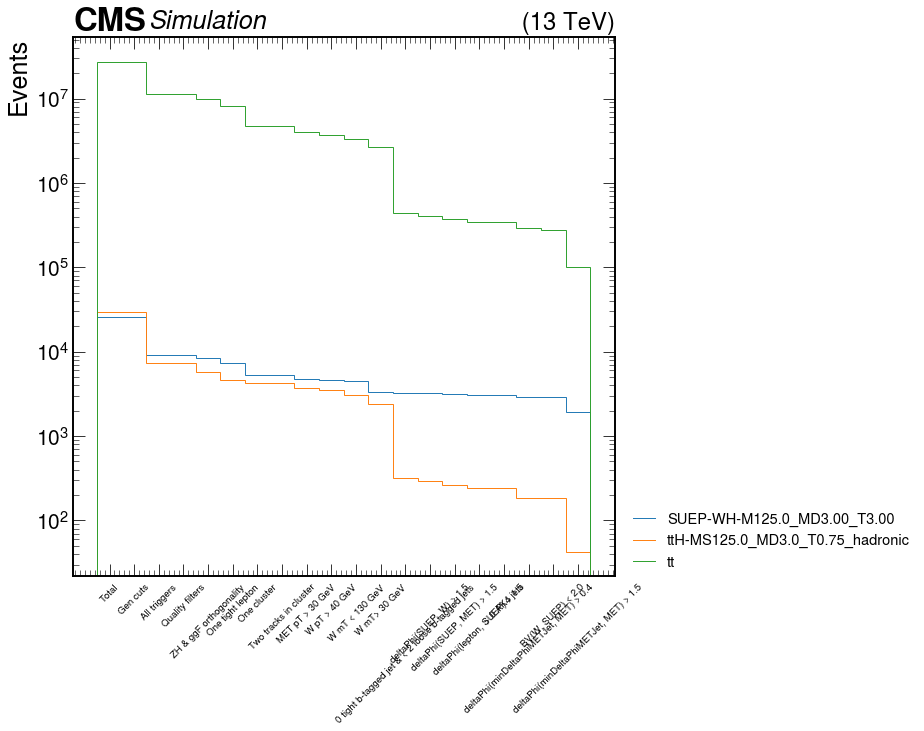

In [197]:
samples= ['SUEP-WH-M125.0_MD3.00_T3.00', "ttH-MS125.0_MD3.0_T0.75_hadronic"] + ['tt']
selections = [
    'total', 
    'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 'twoTracksInCluster',
    'MET_pt_>_30.0_SR',
    'W_pT_from_MET_>_40.0_SR',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_SR",
    'bjetSel_==_1.0_SR',
    'deltaPhi_SUEP_W_>_1.5_SR', 'deltaPhi_SUEP_MET_>_1.5_SR', 'deltaPhi_lepton_SUEP_>_1.5_SR',
    'ngood_ak4jets_>_0.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_SR',
    'W_SUEP_BV_<_2.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_2.0_SR',
]
selection_labels = [
    'Total',
    'Gen cuts', 'All triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One cluster', 'Two tracks in cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT> 30 GeV",
    '0 tight b-tagged jet & < 2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 1.5',
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

## N-1 Plots

Could not find a cutflow for MET_pt0
Could not find a cutflow for W_pT_from_MET1
Could not find a cutflow for W_mT_from_MET2
Could not find a cutflow for W_mT_from_MET3
Could not find a cutflow for deltaPhi_SUEP_W5
Could not find a cutflow for deltaPhi_SUEP_MET6
Could not find a cutflow for deltaPhi_lepton_SUEP7
Could not find a cutflow for ngood_ak4jets8
Could not find a cutflow for deltaPhi_minDeltaPhiMETJet_MET9


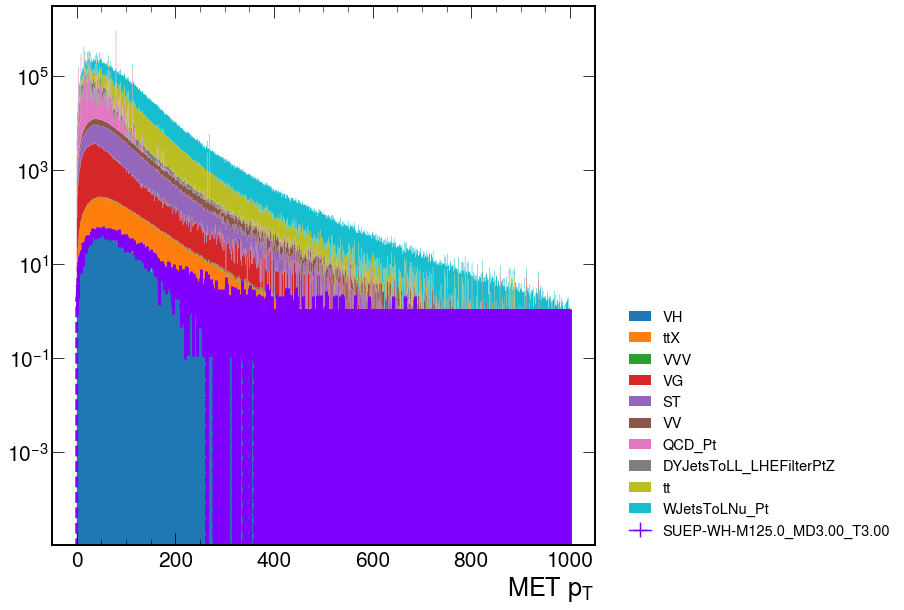

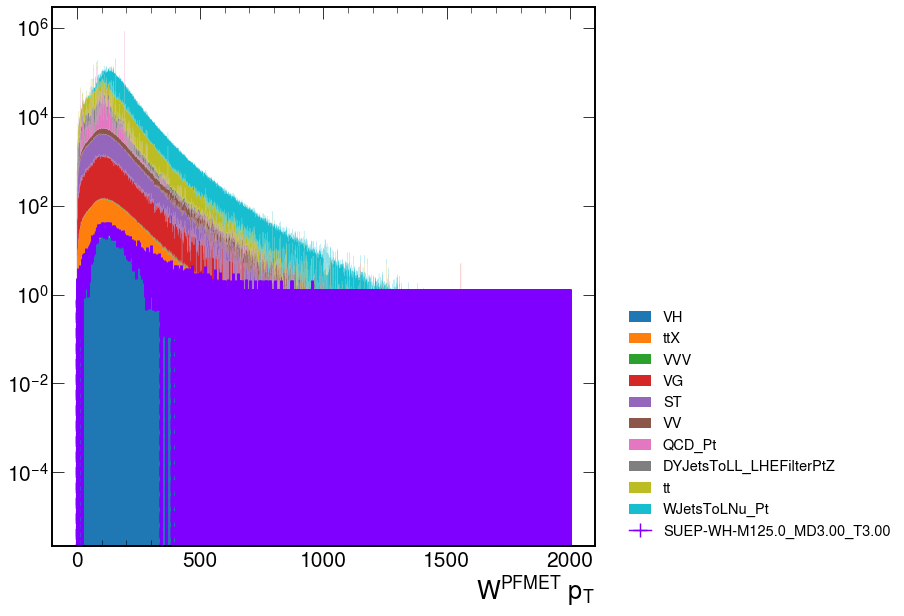

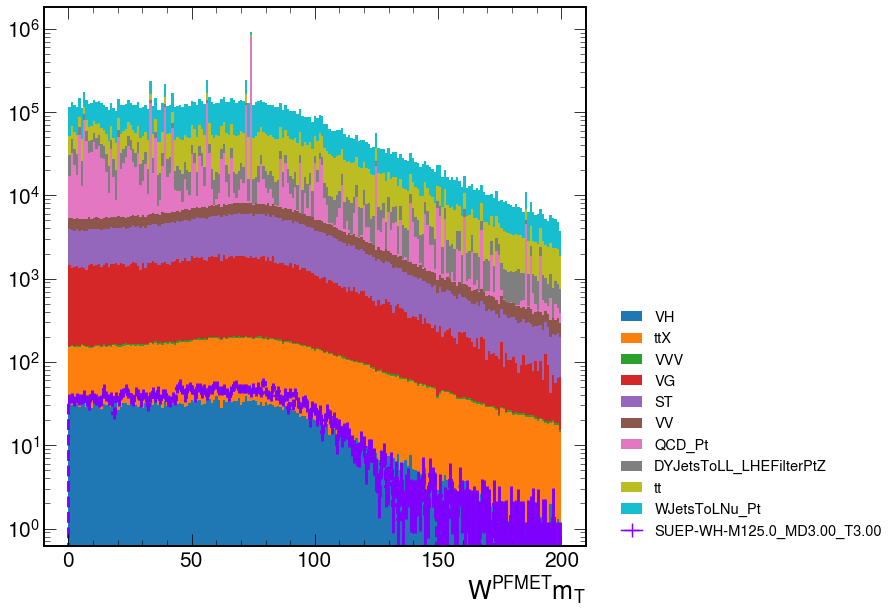

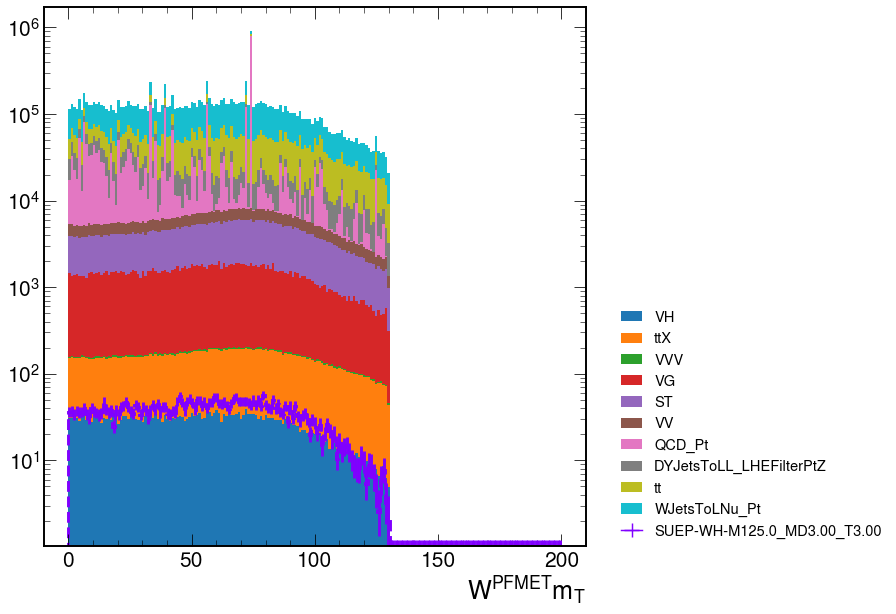

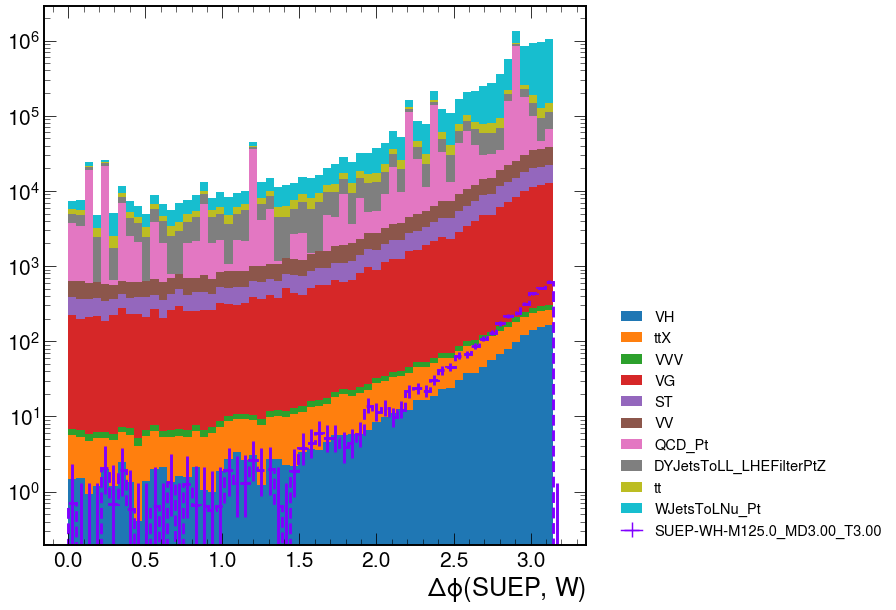

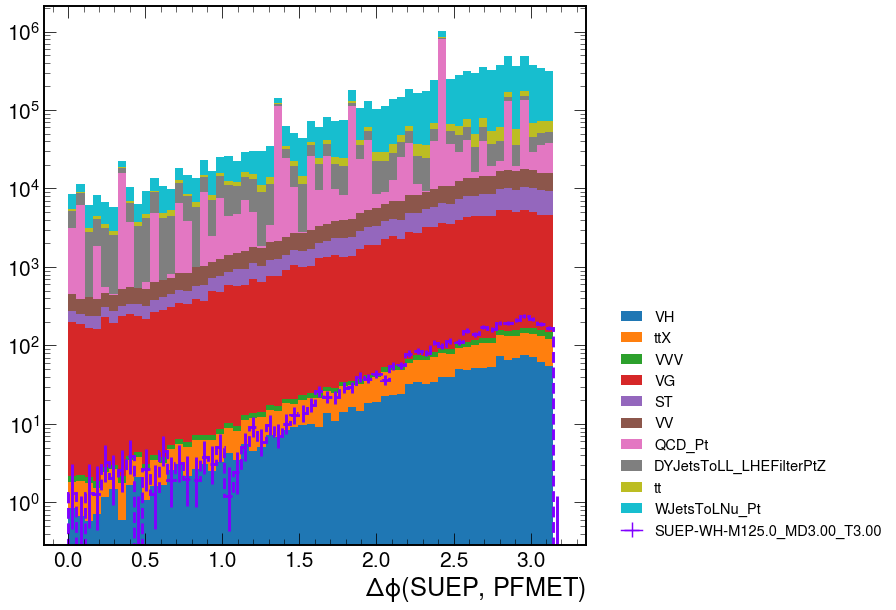

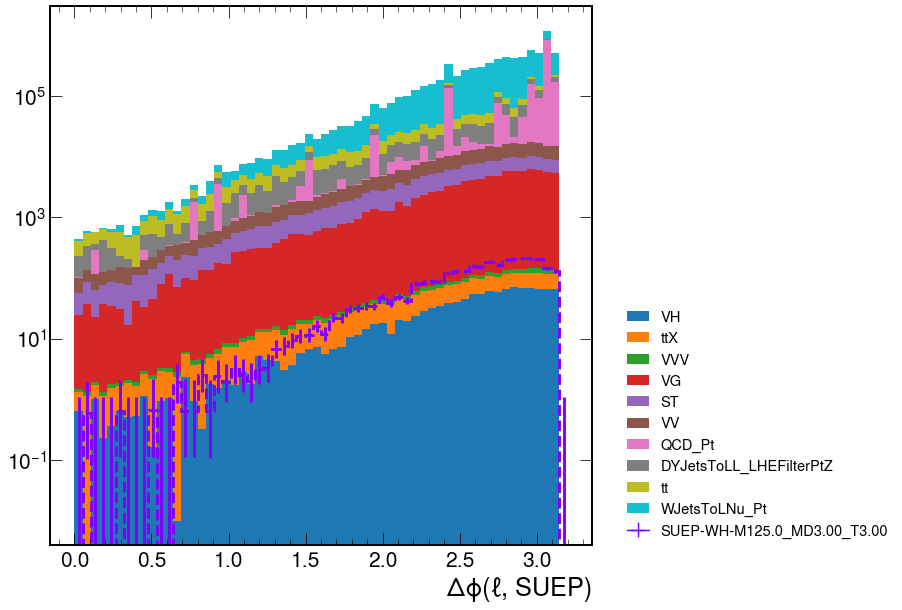

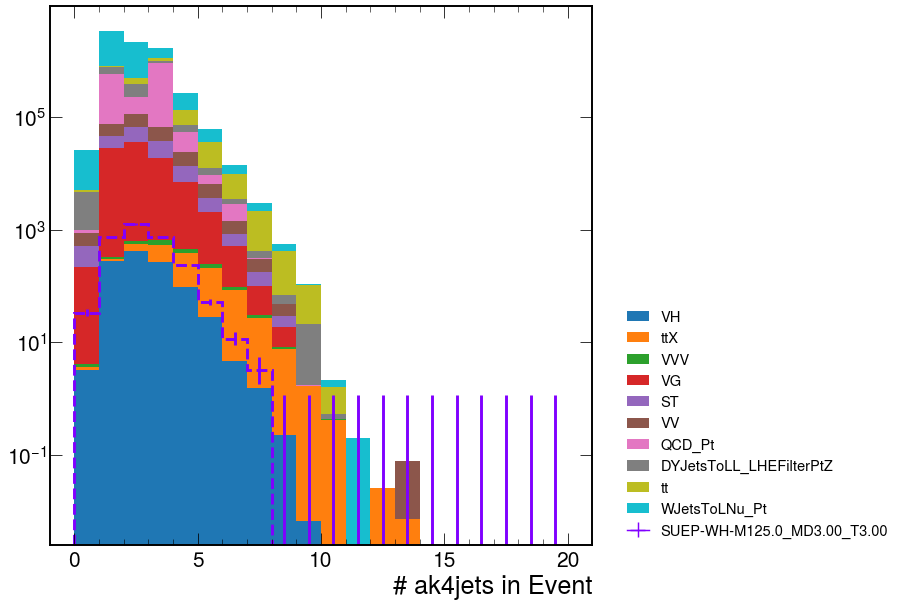

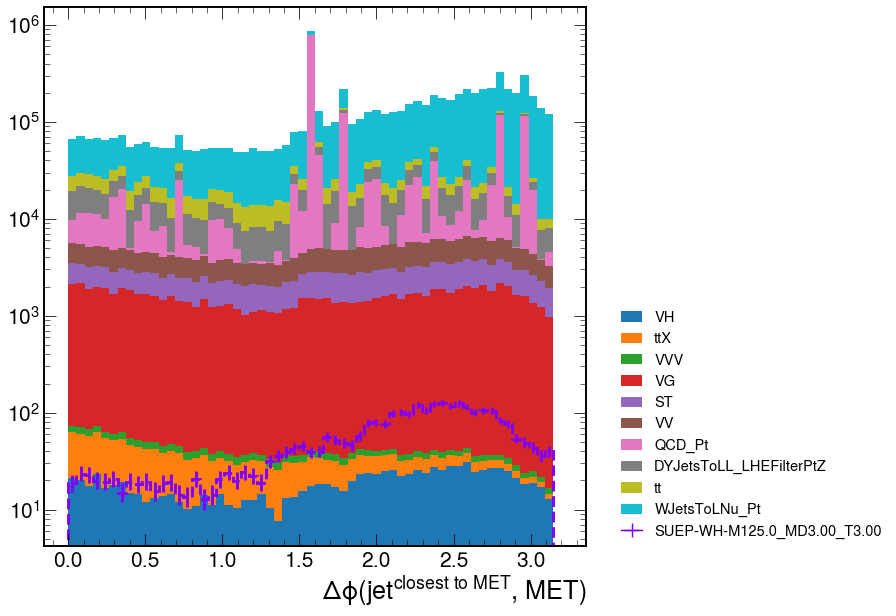

In [119]:
stackedSamples = bkgs
samples = [
    "SUEP-WH-M125.0_MD3.00_T3.00",
]

figs = make_n1_plots(plots, cutflows, "SR", density=False, samples=samples, stackedSamples=stackedSamples)

## Fraction of SR per sample

Show the fraction of each sample out of the total backround as a function of the SUEP candidate # const.

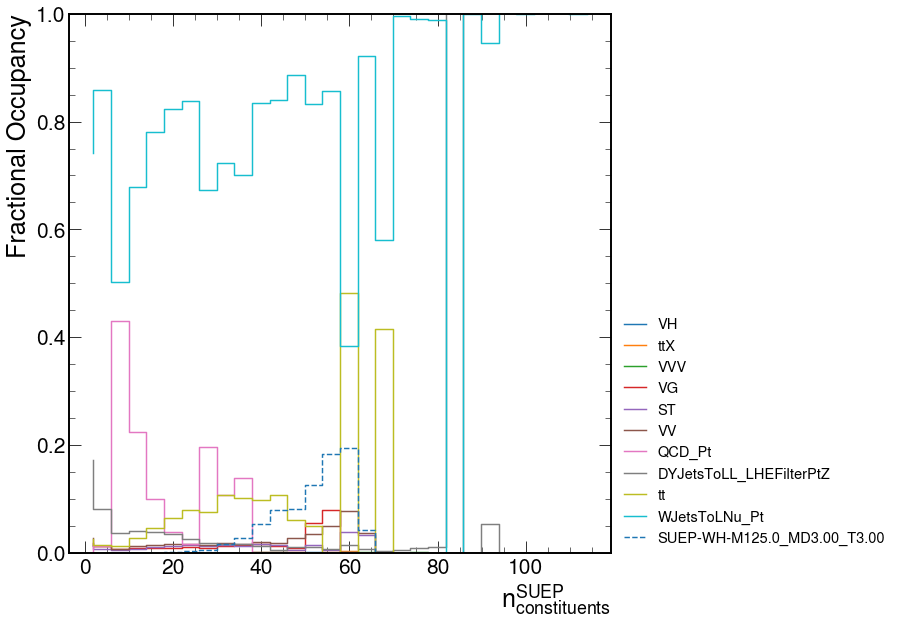

In [186]:
fractions = {}
signals = ['SUEP-WH-M125.0_MD3.00_T3.00']
bkgs_noQCD = bkgs

for s in bkgs_noQCD+signals:
    fractions[s] = plots[s]['2D_SUEP_S1_vs_SUEP_nconst_SR'][::sum, ::4j].values() / plots['MC']['2D_SUEP_S1_vs_SUEP_nconst_SR'][::sum, ::4j].values()

fig, ax = plt.subplots()
for s in fractions.keys():
    if s in bkgs_noQCD: ax.step(plots['MC']['SUEP_nconst_SR'][::4j].axes[0].centers, fractions[s], label=s)
    else: ax.step(plots['MC']['SUEP_nconst_SR'][::4j].axes[0].centers, fractions[s], label=s, linestyle='--')

ax.legend(loc=(1.01, 0), fontsize='xx-small')
ax.set_ylim(0,1)
ax.set_ylabel("Fractional Occupancy")
ax.set_xlabel("$n^{\mathrm{SUEP}}_{\mathrm{constituents}}$")
fig.show()

## CRTT

### Distributions

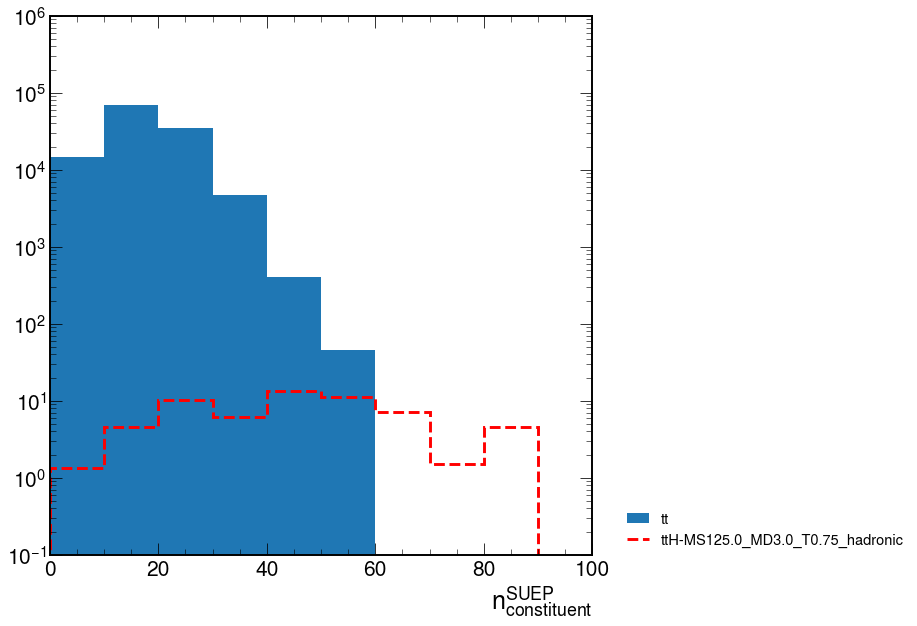

In [195]:
plot_labels = [
    'SUEP_nconst_CRTT',
]
samples = [
    'ttH-MS125.0_MD3.0_T0.75_hadronic'
]
stacked_samples = ['tt']
density = False
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=False, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=False, density=density, label=samples, linestyle='dashed', linewidth=3, color=getColors(samples), ax=ax)
        
    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    plt.ylim(1e-1, 1e6)
    plt.xlim(0, 100)

    # save and show
    if saveFigs: fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    fig.show()

### CRTT vs SR

Compare the shapes of the key variables for the tt background between CRTT and SR.

The shapes should be simliar for the CR to be a reliable estimate of the SR.

(0.5, 2.0)

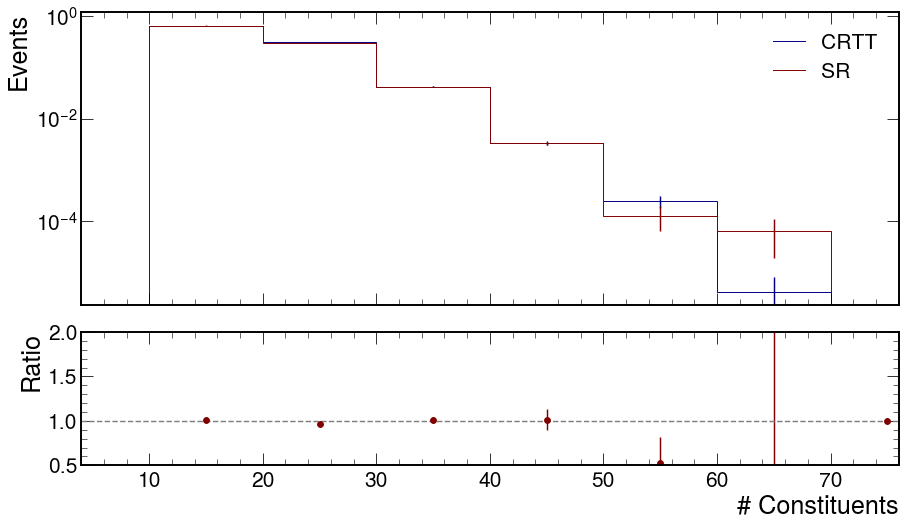

In [39]:
hCRTT = plots['tt']['SUEP_nconst_CRTT'].copy()
hSR = plots['tt']['SUEP_nconst_SR'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hCRTT = rebin_piecewise(hCRTT, new_bins)
hSR = rebin_piecewise(hSR, new_bins)

hCRTT = hCRTT[10j:]
hSR = hSR[10j:]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2)

(0.5, 2.0)

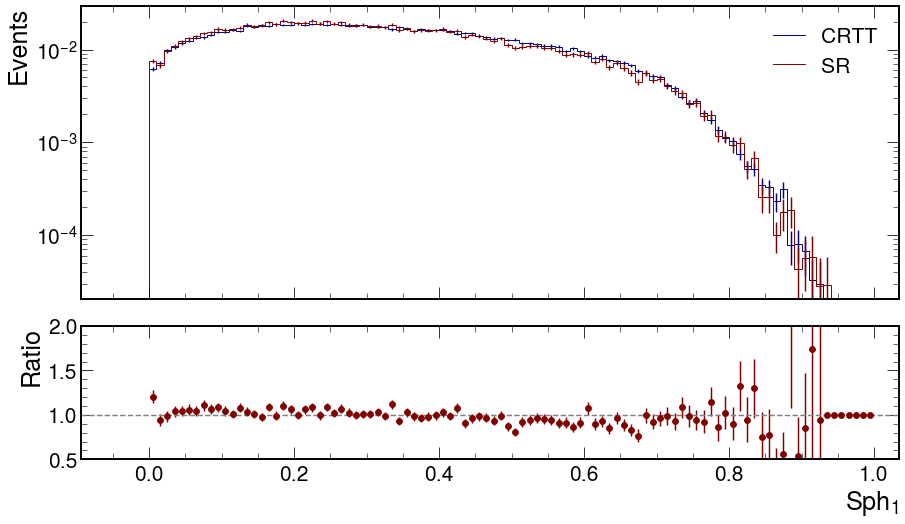

In [40]:
hCRTT = plots['tt']['SUEP_S1_CRTT'].copy()
hSR = plots['tt']['SUEP_S1_SR'].copy()

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

(0.5, 2.0)

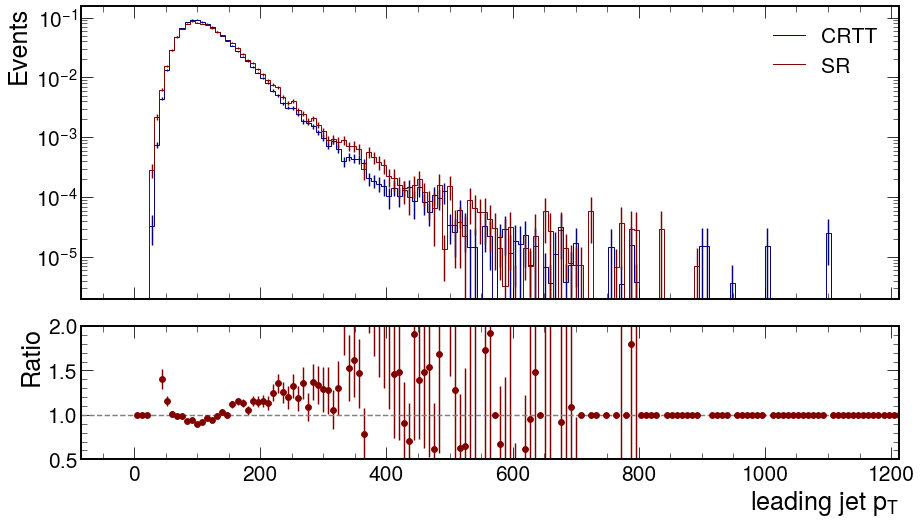

In [179]:
hCRTT = plots['tt']['jet1_pT_CRTT'].copy()[::4j]
hSR = plots['tt']['jet1_pT_SR'].copy()[::4j]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

### Closure

Check ABCD method closure in CRTT

In [28]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [10j, 20j, 30j, 500j]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)
hTTH = plots['ttH-MS125.0_MD3.0_T0.75_hadronic']['2D_SUEP_S1_vs_SUEP_nconst_CRTT'][0.5j::sum,30j:]
hTTH = rebin_piecewise(hTTH, [30, 40, 50, 60, 70, 80, 100])

fig, axs = plot_ratio([SR_exp, SR, hTTH], labels=["$CRTT_{exp}$", "$CRTT_{obs}$", 'ttH-MS125.0_MD3.0_T0.75_hadronic'])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

KeyError: 'ttH-MS125.0_MD3.0_T0.75_hadronic'

In [29]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [10j, 20j, 30j, 500j]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

ValueError: begin < end required

In [8]:
def ABCD_9regions(hist_abcd, xregions, yregions, sum_var="x", return_all=False):
    if sum_var == "x":
        A = hist_abcd[xregions[0] : xregions[1] : sum, yregions[0] : yregions[1]]
        B = hist_abcd[xregions[0] : xregions[1] : sum, yregions[1] : yregions[2]]
        C = hist_abcd[xregions[0] : xregions[1] : sum, yregions[2] : yregions[3]]
        D = hist_abcd[xregions[1] : xregions[2] : sum, yregions[0] : yregions[1]]
        E = hist_abcd[xregions[1] : xregions[2] : sum, yregions[1] : yregions[2]]
        F = hist_abcd[xregions[1] : xregions[2] : sum, yregions[2] : yregions[3]]
        G = hist_abcd[xregions[2] : xregions[3] : sum, yregions[0] : yregions[1]]
        H = hist_abcd[xregions[2] : xregions[3] : sum, yregions[1] : yregions[2]]
        SR = hist_abcd[xregions[2] : xregions[3] : sum, yregions[2] : yregions[3]]
        SR_exp = (
            F
            * F.sum().value ** 3
            * (G.sum().value * C.sum().value / A.sum().value)
            * ((H.sum().value / E.sum().value) ** 4)
            * (G.sum().value * F.sum().value / D.sum().value) ** -2
            * (H.sum().value * C.sum().value / B.sum().value) ** -2
        )
    elif sum_var == "y":
        A = hist_abcd[xregions[0] : xregions[1], yregions[0] : yregions[1] : sum]
        B = hist_abcd[xregions[0] : xregions[1], yregions[1] : yregions[2] : sum]
        C = hist_abcd[xregions[0] : xregions[1], yregions[2] : yregions[3] : sum]
        D = hist_abcd[xregions[1] : xregions[2], yregions[0] : yregions[1] : sum]
        E = hist_abcd[xregions[1] : xregions[2], yregions[1] : yregions[2] : sum]
        F = hist_abcd[xregions[1] : xregions[2], yregions[2] : yregions[3] : sum]
        G = hist_abcd[xregions[2] : xregions[3], yregions[0] : yregions[1] : sum]
        H = hist_abcd[xregions[2] : xregions[3], yregions[1] : yregions[2] : sum]
        SR = hist_abcd[xregions[2] : xregions[3], yregions[2] : yregions[3] : sum]
        SR_exp = (
            H
            * H.sum().value ** 3
            * (G.sum().value * C.sum().value / A.sum().value)
            * ((F.sum().value / E.sum().value) ** 4)
            * (G.sum().value * F.sum().value / D.sum().value) ** -2
            * (H.sum().value * C.sum().value / B.sum().value) ** -2
        )

    if return_all:
        return A, B, C, D, E, F, G, H, SR, SR_exp
    else:
        return SR, SR_exp


def make_ABCD_9regions(hist_abcd, xregions, yregions, sum_var="X"):
    if sum_var == "x":
        A = hist_abcd[xregions[0][0] : xregions[0][1] : sum, yregions[0][0] : yregions[0][1]]
        B = hist_abcd[xregions[0][0] : xregions[0][1] : sum, yregions[1][0] : yregions[1][1]]
        C = hist_abcd[xregions[0][0] : xregions[0][1] : sum, yregions[2][0] : yregions[2][1]]
        D = hist_abcd[xregions[1][0] : xregions[1][1] : sum, yregions[0][0] : yregions[0][1]]
        E = hist_abcd[xregions[1][0] : xregions[1][1] : sum, yregions[1][0] : yregions[1][1]]
        F = hist_abcd[xregions[1][0] : xregions[1][1] : sum, yregions[2][0] : yregions[2][1]]
        G = hist_abcd[xregions[2][0] : xregions[2][1] : sum, yregions[0][0] : yregions[0][1]]
        H = hist_abcd[xregions[2][0] : xregions[2][1] : sum, yregions[1][0] : yregions[1][1]]
        SR = hist_abcd[xregions[2][0] : xregions[2][1] : sum, yregions[2][0] : yregions[2][1]]

    elif sum_var == "y":
        A = hist_abcd[xregions[0][0] : xregions[0][1] : sum, yregions[0][0] : yregions[0][1]]
        B = hist_abcd[xregions[0][0] : xregions[0][1] : sum, yregions[1][0] : yregions[1][1]]
        C = hist_abcd[xregions[0][0] : xregions[0][1] : sum, yregions[2][0] : yregions[2][1]]
        D = hist_abcd[xregions[1][0] : xregions[1][1] : sum, yregions[0][0] : yregions[0][1]]
        E = hist_abcd[xregions[1][0] : xregions[1][1] : sum, yregions[1][0] : yregions[1][1]]
        F = hist_abcd[xregions[1][0] : xregions[1][1] : sum, yregions[2][0] : yregions[2][1]]
        G = hist_abcd[xregions[2][0] : xregions[2][1] : sum, yregions[0][0] : yregions[0][1]]
        H = hist_abcd[xregions[2][0] : xregions[2][1] : sum, yregions[1][0] : yregions[1][1]]
        SR = hist_abcd[xregions[2][0] : xregions[2][1] : sum, yregions[2][0] : yregions[2][1]]
       
    return A, B, C, D, E, F, G, H, SR



def ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var="x", approx=True, new_bins=None):
    """
    Does 9 region ABCD using error propagation of the statistical uncertanties of the regions.
    """

    if sum_var == "y":
        raise Exception("sum_var='y' not implemented yet")

    A, B, C, D, E, F, G, H, SR = make_ABCD_9regions(
        abcd, xregions, yregions, sum_var=sum_var
    )
    SR_exp = SR.copy()

    # we need to rebin here in the case appox=True
    if new_bins:
        if sum_var == "x":
            F = rebin_piecewise(F, new_bins)
            C = rebin_piecewise(C, new_bins)
            SR = rebin_piecewise(SR, new_bins)
            SR_exp = rebin_piecewise(SR_exp, new_bins)

    preds, preds_err = [], []
    for i in range(len(F.values())):
        # this is needed in order to do error propagation correctly
        F_bin = F[i]
        C_bin = C[i]
        F_other = F.copy()
        F_other[i] = hist.accumulators.WeightedSum()

        # define the scaling factor function
        a, b, c, c_bin, d, e, f_bin, f_other, g, h = symbols("A B C C_bin D E F_bin F_other G H")
        if sum_var == "x" and approx:
            exp = (
                f_bin
                * (f_other + f_bin)
                * h**2
                * d**2
                * b**2
                * g**-1
                * c**-1
                * a**-1
                * e**-4
            )
        elif sum_var == "x" and not approx:
            exp = (
                f_bin**2
                * h**2
                * d**2
                * b**2
                * g**-1
                * c_bin**-1
                * a**-1
                * e**-4
            )
        elif sum_var == "y":
            pass

        # defines lists of variables (sympy symbols) and accumulators (hist.sum())
        variables = [a, b, c, c_bin, d, e, f_bin, f_other, g, h]
        accs = [
            A.sum(),
            B.sum(),
            C.sum(),
            C_bin,
            D.sum(),
            E.sum(),
            F_bin,
            F_other.sum(),
            G.sum(),
            H.sum(),
        ]

        # calculate scaling factor by substituting values of the histograms' sums for the sympy symbols
        alpha = exp.copy()
        for var, acc in zip(variables, accs):
            alpha = alpha.subs(var, acc.value)

        # calculate the error on the scaling factor
        variance = 0
        for var, acc in zip(variables, accs):
            der = diff(exp, var)
            var = abs(acc.variance)
            variance += der**2 * var
        for var, acc in zip(variables, accs):
            variance = variance.subs(var, acc.value)
        sigma_alpha = variance

        if type(alpha) != sympy.core.numbers.Float or alpha <= 0:
            alpha = 0

        preds.append(alpha)
        preds_err.append(sigma_alpha)

    SR_exp.view().variance = preds_err
    SR_exp.view().value = preds

    return SR, SR_exp


def ABCD_9regions_errorProp_OLD(abcd, xregions, yregions, sum_var="x", approx=True, new_bins=None):
    """
    Does 9 region ABCD using error propagation of the statistical uncertanties of the regions.
    """

    if sum_var == "y":
        raise Exception("sum_var='y' not implemented yet")

    A, B, C, D, E, F, G, H, SR, SR_exp = ABCD_9regions(
        abcd, xregions, yregions, sum_var=sum_var, return_all=True
    )

    if new_bins:
        if sum_var == "x": 
            F = rebin_piecewise(F, new_bins)
            C = rebin_piecewise(C, new_bins)
            SR = rebin_piecewise(SR, new_bins)
            SR_exp = rebin_piecewise(SR_exp, new_bins)

    preds, preds_err = [], []
    for i in range(len(F.values())):
        # this is needed in order to do error propagation correctly
        F_bin = F[i]
        C_bin = C[i]
        F_other = F.copy()
        F_other[i] = hist.accumulators.WeightedSum()

        # define the scaling factor function
        a, b, c, c_bin, d, e, f_bin, f_other, g, h = symbols("A B C C_bin D E F_bin F_other G H")
        if sum_var == "x" and approx:
            exp = (
                f_bin
                * (f_other + f_bin)
                * h**2
                * d**2
                * b**2
                * g**-1
                * c**-1
                * a**-1
                * e**-4
            )
        elif sum_var == "x" and not approx:
            exp = (
                f_bin**2
                * h**2
                * d**2
                * b**2
                * g**-1
                * c_bin**-1
                * a**-1
                * e**-4
            )
        elif sum_var == "y":
            pass

        # defines lists of variables (sympy symbols) and accumulators (hist.sum())
        variables = [a, b, c, c_bin, d, e, f_bin, f_other, g, h]
        accs = [
            A.sum(),
            B.sum(),
            C.sum(),
            C_bin,
            D.sum(),
            E.sum(),
            F_bin,
            F_other.sum(),
            G.sum(),
            H.sum(),
        ]

        # calculate scaling factor by substituting values of the histograms' sums for the sympy symbols
        alpha = exp.copy()
        for var, acc in zip(variables, accs):
            alpha = alpha.subs(var, acc.value)

        # calculate the error on the scaling factor
        variance = 0
        for var, acc in zip(variables, accs):
            der = diff(exp, var)
            var = abs(acc.variance)
            variance += der**2 * var
        for var, acc in zip(variables, accs):
            variance = variance.subs(var, acc.value)
        sigma_alpha = variance

        if type(alpha) != sympy.core.numbers.Float or alpha <= 0:
            alpha = 0

        preds.append(alpha)
        preds_err.append(sigma_alpha)

    SR_exp.view().variance = preds_err
    SR_exp.view().value = preds

    return SR, SR_exp

In [80]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
xregions_OLD = [0.3j, 0.4j, 0.5j, 1.0j]
yregions_OLD = [10j, 20j, 30j, 500j]
sample = 'MC'


abcd = plots[sample][plot_label]

SR_OLD, SR_exp_OLD = ABCD_9regions_errorProp_OLD(abcd, xregions_OLD, yregions_OLD, sum_var='x', approx=False, new_bins=new_bins)
SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)


In [81]:
print(SR.values() == SR_OLD.values())

[ True  True  True  True  True  True]


(0.5, 1.5)

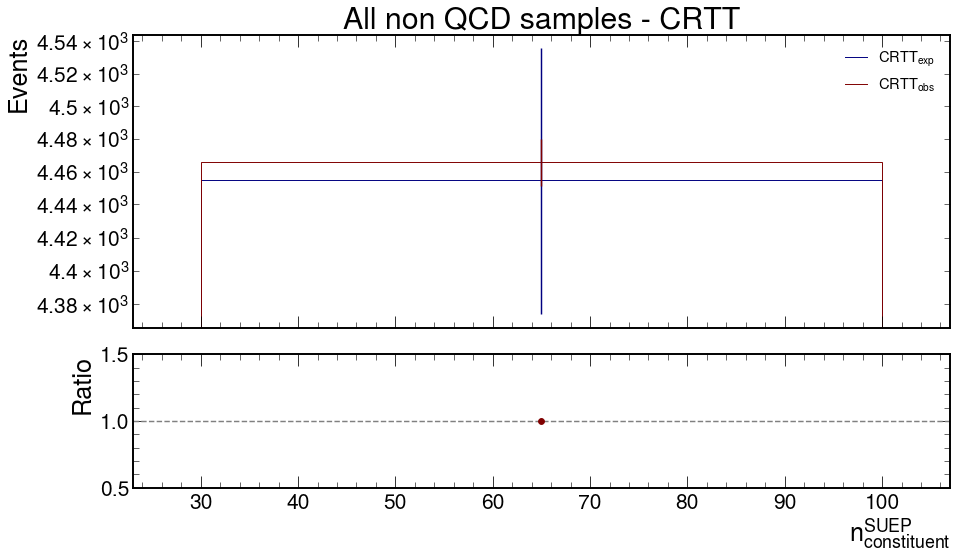

In [43]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_CRTT'
new_bins = [30, 100]
rebin = True
xregions = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
#yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
yregions = [[20j, 25j], [25j, 30j], [30j, 35j]]
sample = 'tt'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].set_title("All non QCD samples - CRTT")
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0.5, 1.5)
# axs[1].set_xlim(25, 100)

(0.5, 1.5)

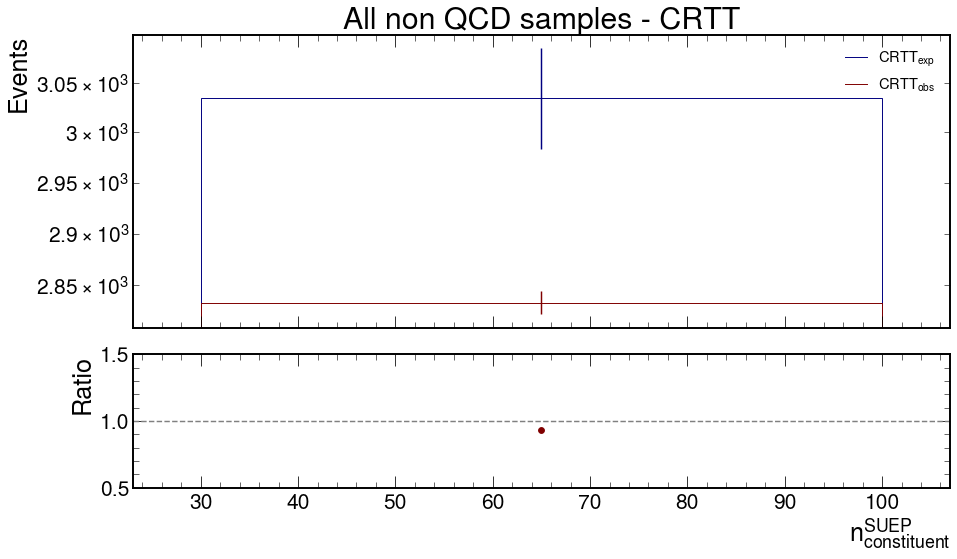

In [45]:
plot_label = '2D_ak4jet1_inSUEPcluster_pT_vs_SUEP_nconst_CRTT'
new_bins = [30, 100]
rebin = True
xregions = [[200j, 300j], [100j,200j], [0.0j,100j]]
#yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
yregions = [[20j, 25j], [25j, 30j], [30j, 35j]]
sample = 'tt'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].set_title("All non QCD samples - CRTT")
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0.5, 1.5)
# axs[1].set_xlim(25, 100)

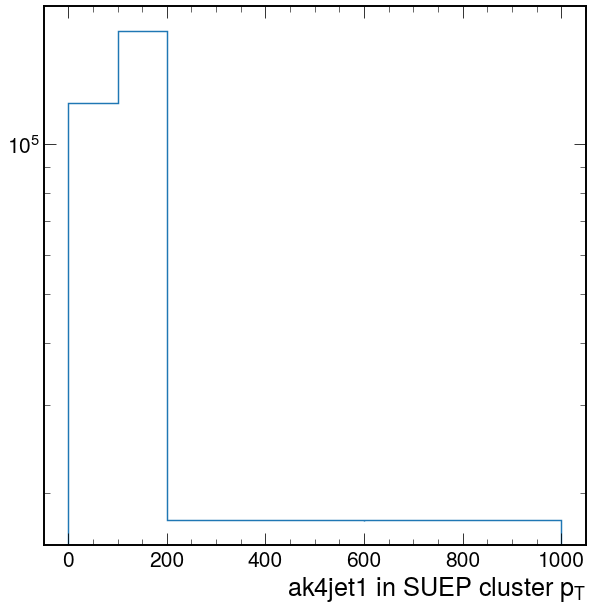

In [48]:
h = plots['tt']['ak4jet1_inSUEPcluster_pT_CRTT']
h = rebin_piecewise(h, [0, 100, 200, 1000])
hep.histplot(h)
plt.yscale('log')

(25.0, 100.0)

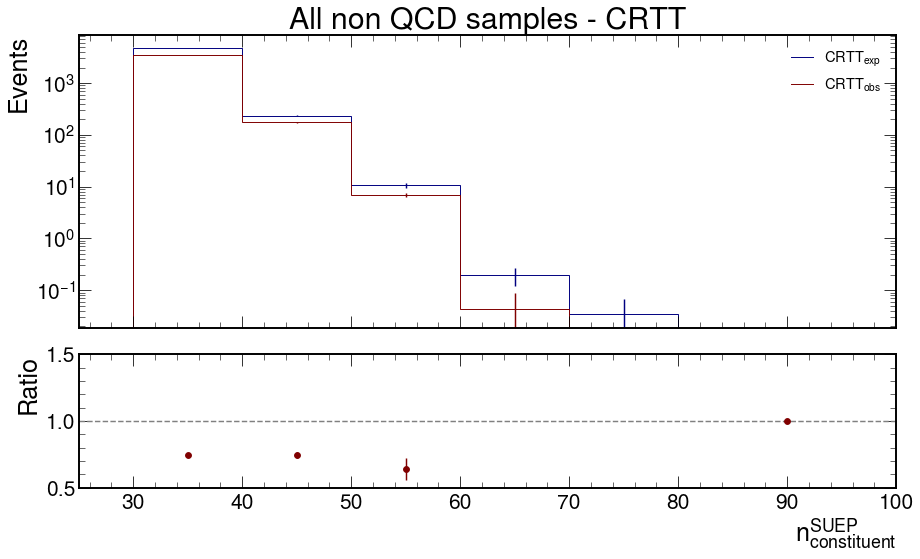

In [18]:
plot_label = '2D_ak4jet1_inSUEPcluster_pT_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[200j, 300j], [100j,200j], [0.0j,100j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'tt'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].set_title("All non QCD samples - CRTT")
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0.5, 1.5)
axs[1].set_xlim(25, 100)

(25.0, 100.0)

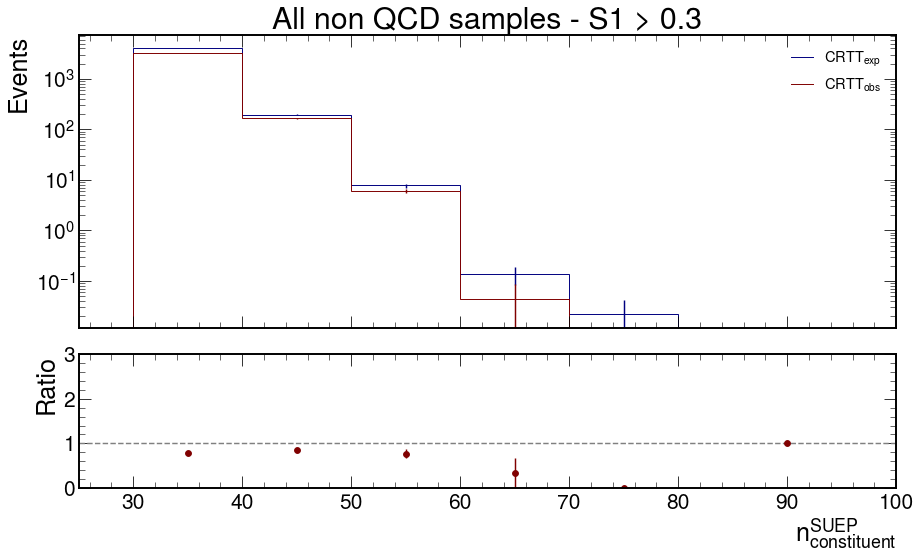

In [14]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT_S0p3'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[200j, 1000j], [100j,200j], [0.0j,100j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'tt'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].set_title("All non QCD samples - S1 > 0.3")
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0, 3)
axs[1].set_xlim(25, 100)

(25.0, 100.0)

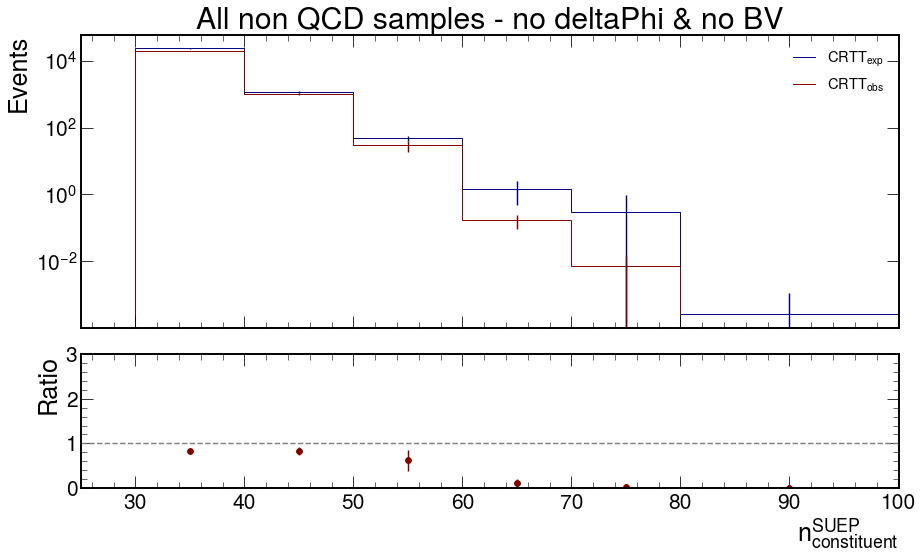

In [25]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT_noDeltaPhi_noBV'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[200j, 10000j], [100j,200j], [0.0j,100j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].set_title("All non QCD samples - no deltaPhi & no BV")
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0, 3)
axs[1].set_xlim(25, 100)

(25.0, 100.0)

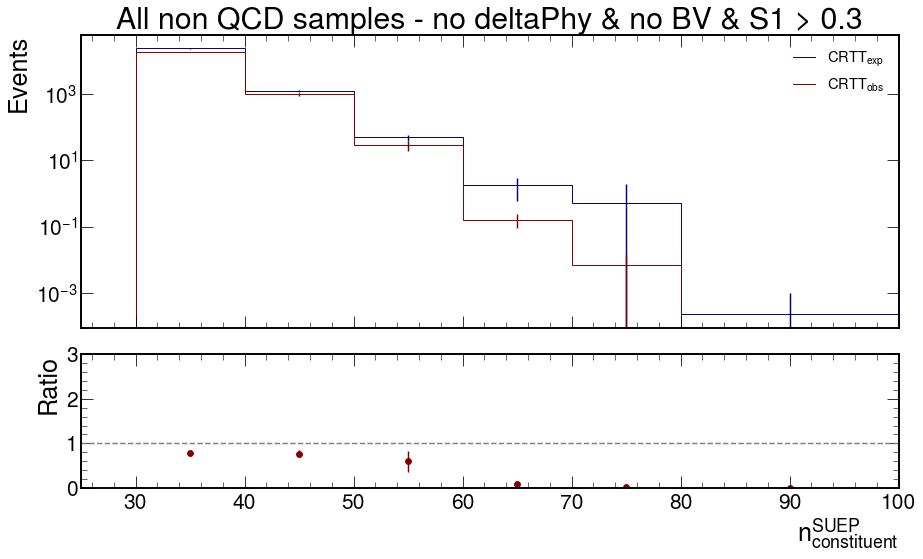

In [24]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT_noDeltaPhi_noBV_S0p3'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[200j, 10000j], [100j,200j], [0.0j,100j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].set_title("All non QCD samples - no deltaPhy & no BV & S1 > 0.3")
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0, 3)
axs[1].set_xlim(25, 100)

(0.0, 3.0)

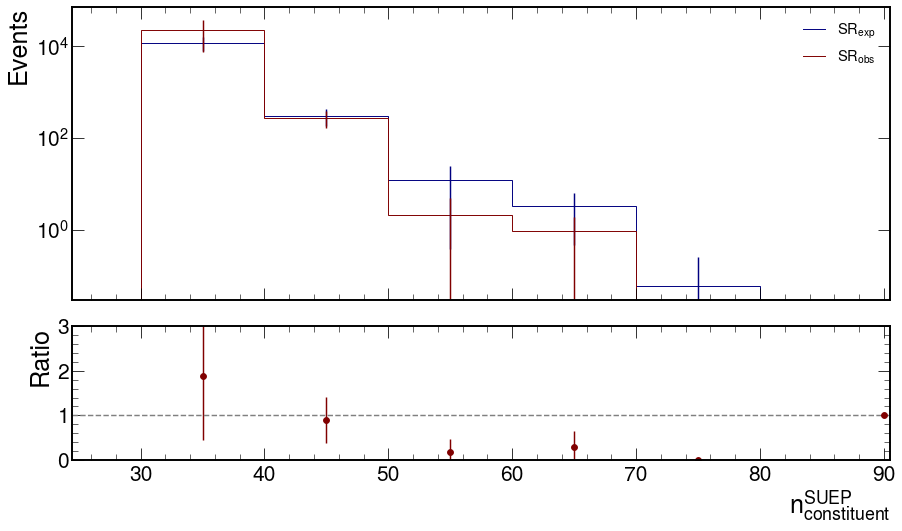

In [86]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_SR'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[200j, 10000j], [100j,200j], [0.0j,100j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')
axs[1].set_ylim(0, 3)

### Cutflows

Yields
+-------------------------------------------------+-----------------------------+----------------------------------+------------+
|                    Selection                    | SUEP-WH-M125.0_MD3.00_T3.00 | ttH-MS125.0_MD3.0_T0.75_hadronic |     tt     |
+-------------------------------------------------+-----------------------------+----------------------------------+------------+
|                      Total                      |            25807            |              29831               | 2.7135e+07 |
|                     Gen cuts                    |            25807            |              29831               | 2.7135e+07 |
|                   All triggers                  |            9153.2           |              7336.5              | 1.1327e+07 |
|                 Quality filters                 |             9152            |              7332.1              | 1.132e+07  |
|              ZH & ggF orthogonality             |            8482.3           |  

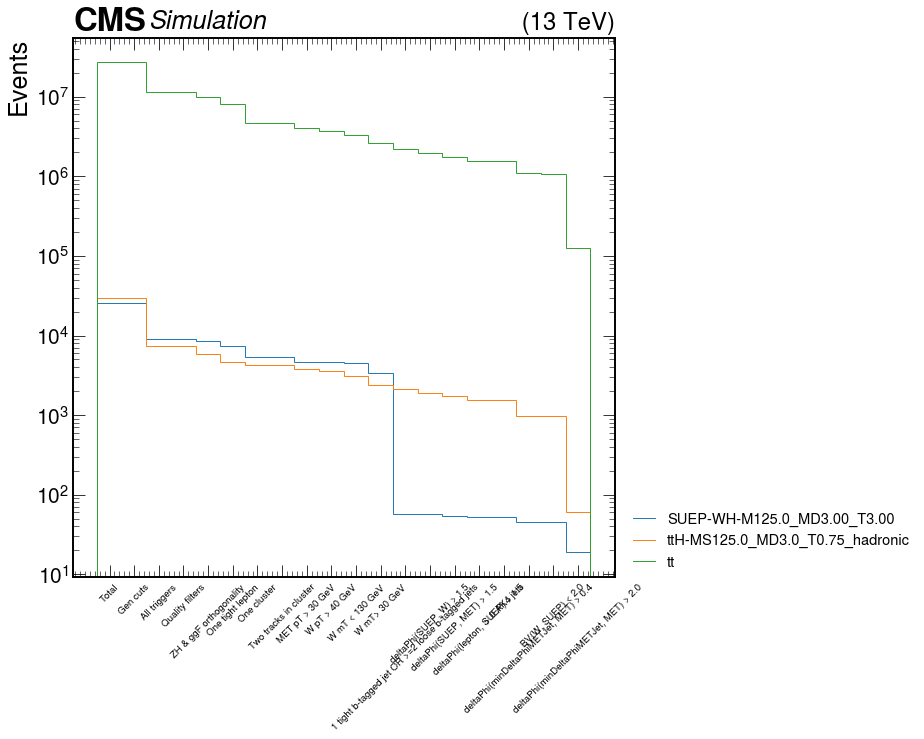

In [193]:
samples= [
    'SUEP-WH-M125.0_MD3.00_T3.00',
    "ttH-MS125.0_MD3.0_T0.75_hadronic"
] + ['tt']
selections = [
    'total', 
    'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 'twoTracksInCluster',
    'MET_pt_>_30.0_CRTT',
    'W_pT_from_MET_>_40.0_CRTT',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_CRTT",
    'bjetSel_==_0.0_CRTT',
    'deltaPhi_SUEP_W_>_1.5_CRTT', 'deltaPhi_SUEP_MET_>_1.5_CRTT', 'deltaPhi_lepton_SUEP_>_1.5_CRTT',
    #'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'ngood_ak4jets_>_0.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'W_SUEP_BV_<_2.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_2.0_CRTT',
    #'nphotons_==_0.0_HighestPT',
    #'ngood_ak4jets_<_4.0_HighestPT',
    #'nak4jets_outsideSUEP_<_2.0_HighestPT'
]
selection_labels = [
    'Total',
    'Gen cuts', 'All triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One cluster', 'Two tracks in cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT> 30 GeV",
    '1 tight b-tagged jet OR >=2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 2.0',
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### N-1 Plots

Could not find a cutflow for MET_pt0
Could not find a cutflow for W_pT_from_MET1
Could not find a cutflow for W_mT_from_MET2
Could not find a cutflow for W_mT_from_MET3
Could not find a cutflow for deltaPhi_SUEP_W5
Could not find a cutflow for deltaPhi_SUEP_MET6
Could not find a cutflow for deltaPhi_lepton_SUEP7
Could not find a cutflow for ngood_ak4jets8
Could not find a cutflow for deltaPhi_minDeltaPhiMETJet_MET9


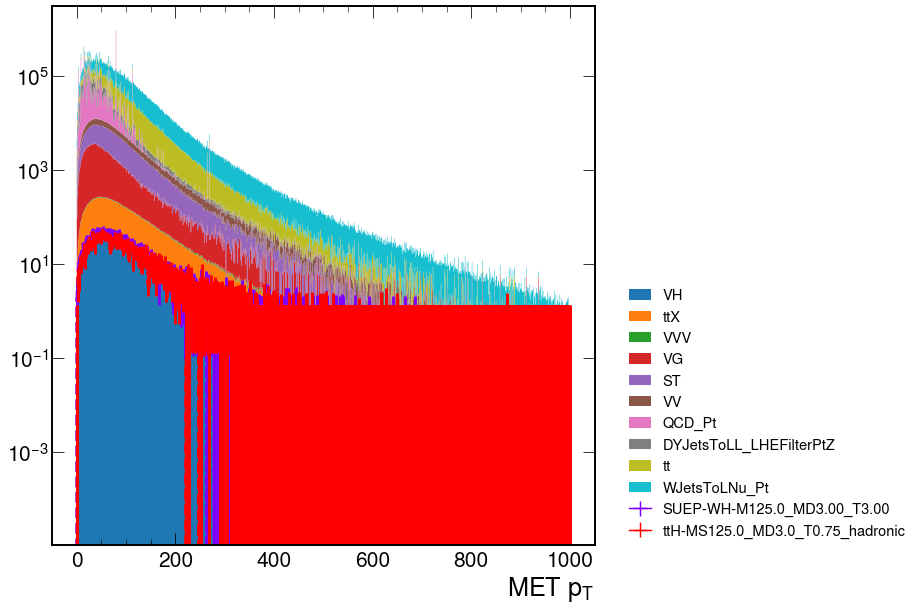

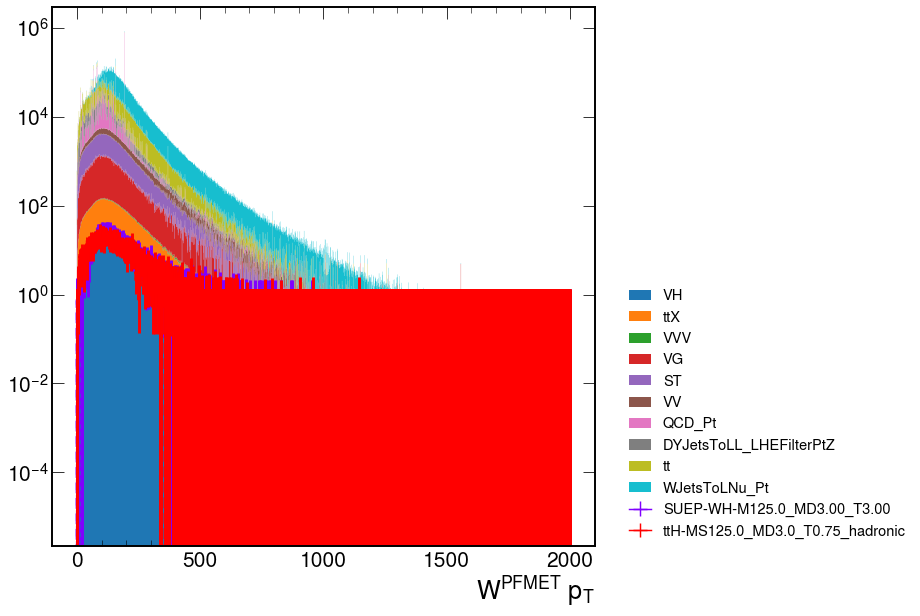

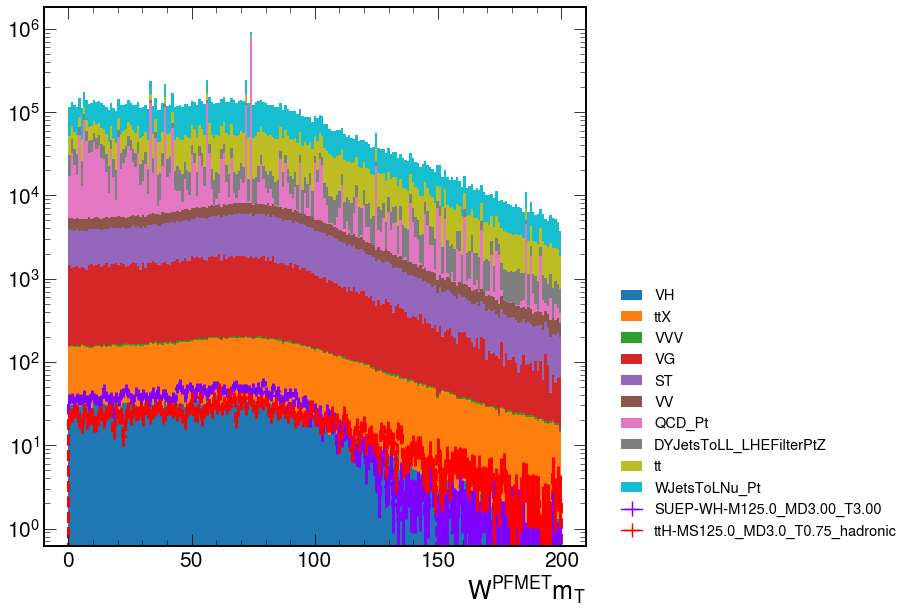

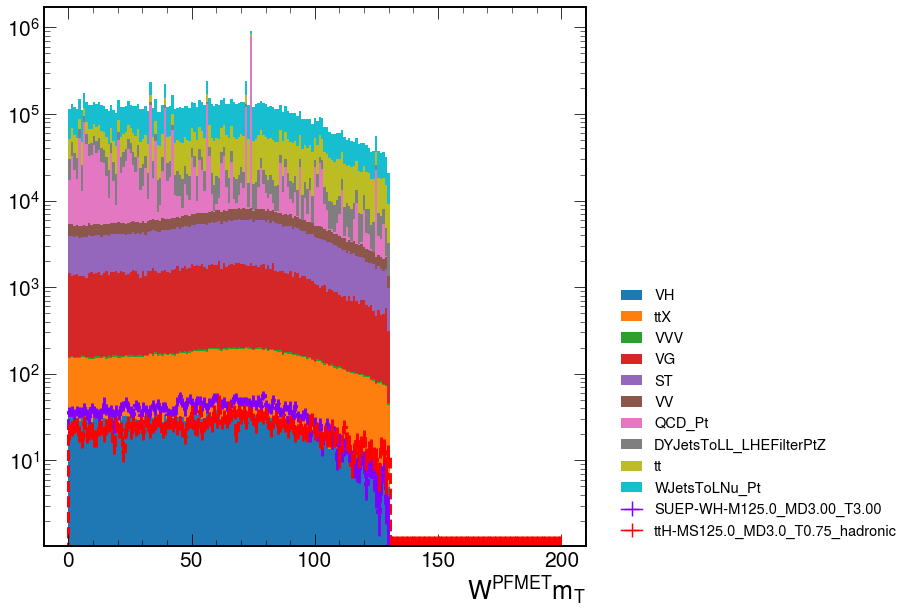

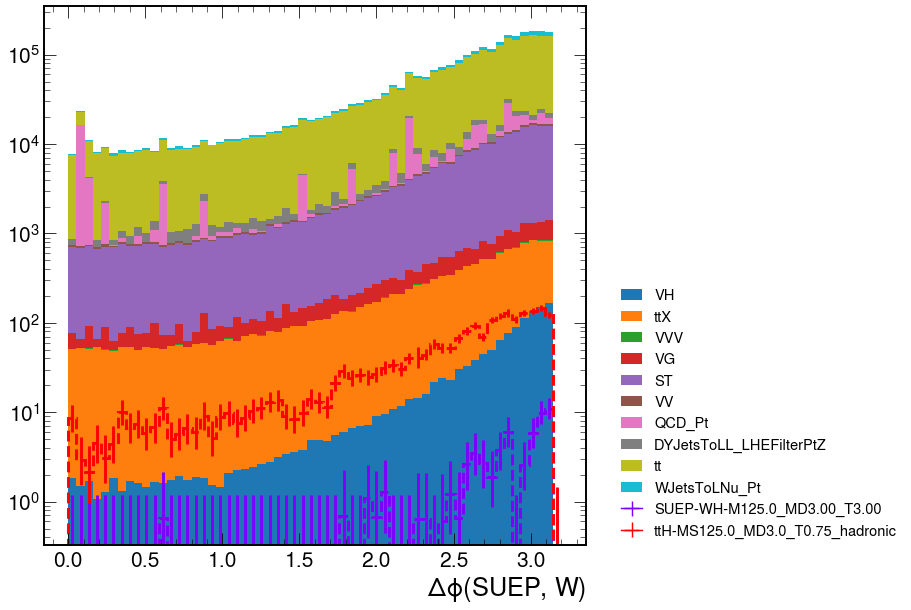

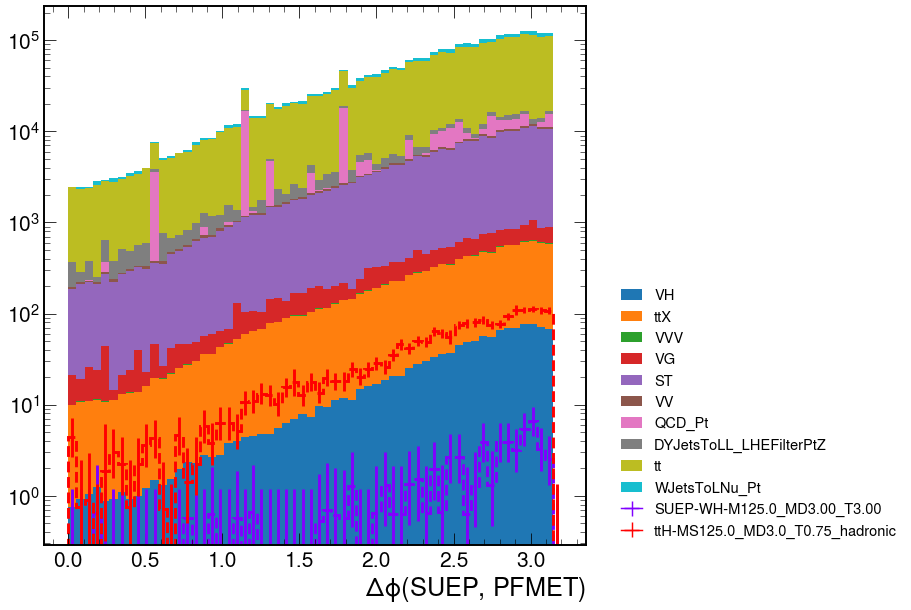

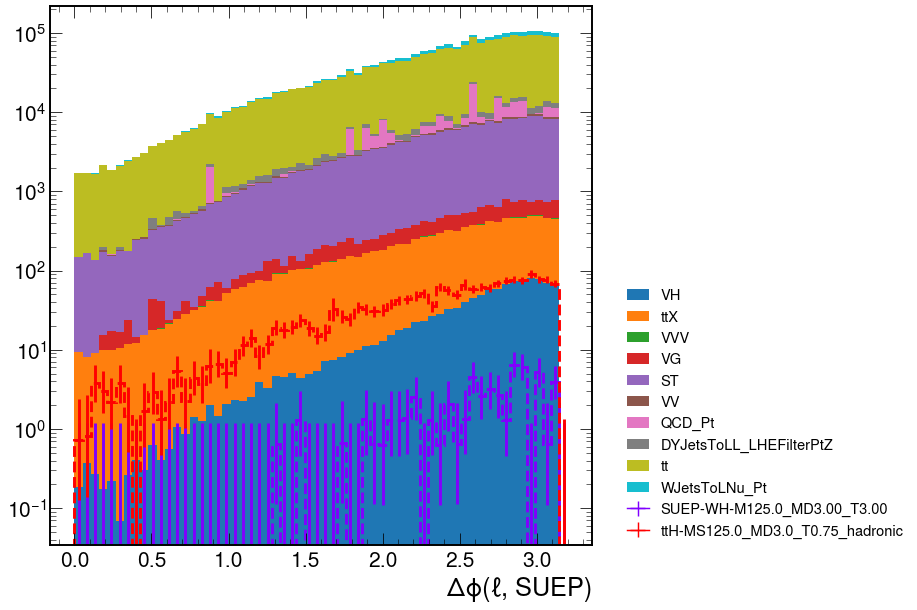

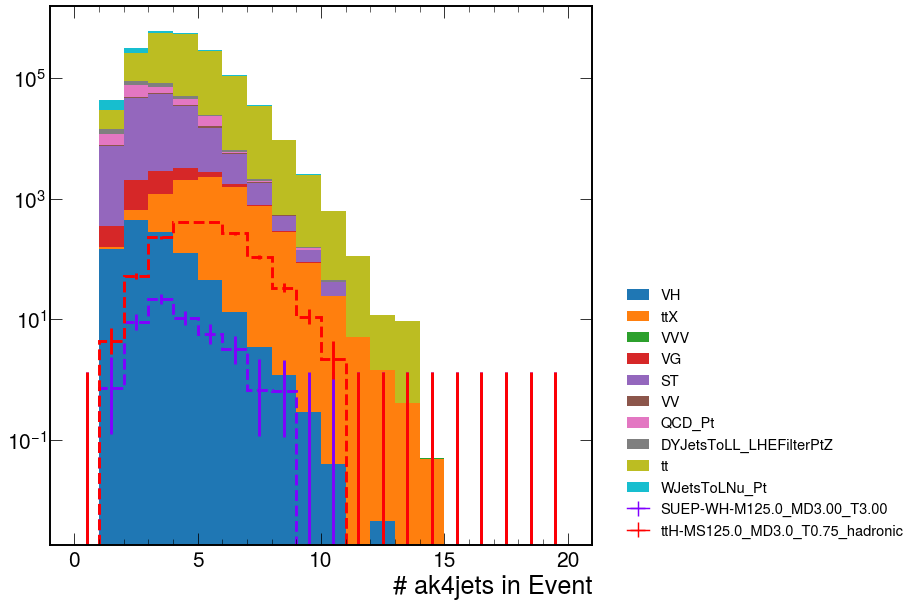

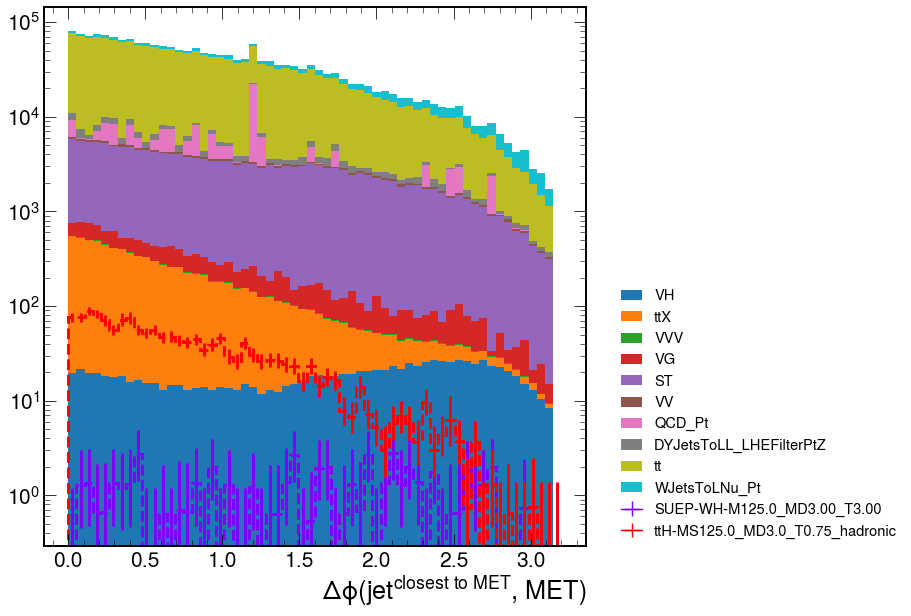

In [117]:
stackedSamples = bkgs
samples = [
    "SUEP-WH-M125.0_MD3.00_T3.00",
    "ttH-MS125.0_MD3.0_T0.75_hadronic"
]

figs = make_n1_plots(plots, cutflows, "CRTT", samples=samples, stackedSamples=stackedSamples)


### ttH & WH Contamination

Find the samples with highest yields in CRTT in high # constituents region.

ttH-MS125.0_MD3.0_T0.75_hadronic:
  85.94% of total
ttHToNonbb_M125:
  0.50% of total
ttHTobb_M125:
  0.26% of total
WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_3_31_CRW:
  22.46% of total
WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_3_31_CRW:
  0.00% of total


(0.0, 5.0)

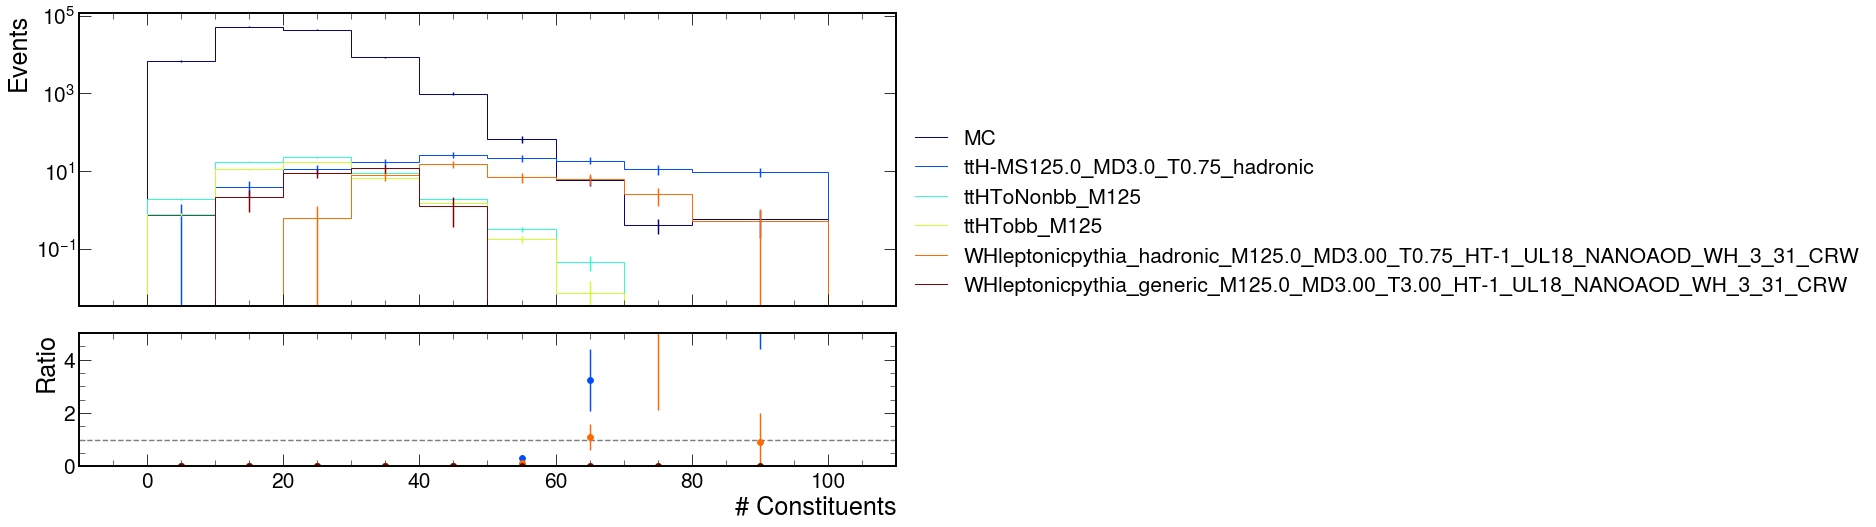

In [90]:
ttH_samples = np.array([s for s in plots.keys() if s.startswith('ttH')])
wh_samples = np.array([s for s in plots.keys() if s.startswith('WHleptonic')])

# integrate SUEP nconst > 30 to f
tth_yields = []
for ttH_sample in ttH_samples:
    nevents = plots[ttH_sample]['SUEP_nconst_CRTT'][50j:].sum().value
    tth_yields.append(nevents)
wh_yields = []
for wh_sample in wh_samples:
    nevents = plots[wh_sample]['SUEP_nconst_CRTT'][50j:].sum().value
    wh_yields.append(nevents)

# highest 5 contaminants
tth_yields = np.array(tth_yields)
wh_yields = np.array(wh_yields)
highest_tth_yields = tth_yields[np.argsort(tth_yields)[::-1]][:5]
highest_wh_yields = wh_yields[np.argsort(wh_yields)[::-1]][:5]
highest_tth_samples = ttH_samples[np.argsort(tth_yields)[::-1]][:5]
highest_wh_samples = wh_samples[np.argsort(wh_yields)[::-1]][:5]

nbkg = plots['MC']['SUEP_nconst_CRTT'][50j:].sum().value 
for yield_, sample in zip(highest_tth_yields, highest_tth_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")
for yield_, sample in zip(highest_wh_yields, highest_wh_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")

# make a plot of the highest 5 contaminants
hlist, samples = [], []
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
hBkg = plots['MC']['SUEP_nconst_CRTT'].copy()
hBkg = rebin_piecewise(hBkg, new_bins)
hlist.append(hBkg)
samples.append('MC')
for yield_, sample in zip(highest_tth_yields, highest_tth_samples):
    hTTH = plots[sample]['SUEP_nconst_CRTT'].copy()
    hTTH = rebin_piecewise(hTTH, new_bins)
    hlist.append(hTTH)
    samples.append(sample)
for yield_, sample in zip(highest_wh_yields, highest_wh_samples):
    hWH = plots[sample]['SUEP_nconst_CRTT'].copy()
    hWH = rebin_piecewise(hWH, new_bins)
    hlist.append(hWH)
    samples.append(sample)

fig, axs = plot_ratio(hlist, samples)
axs[0].legend(loc=(1.01, 0))
axs[1].set_ylim(0, 5)

## CRW

### Distributions

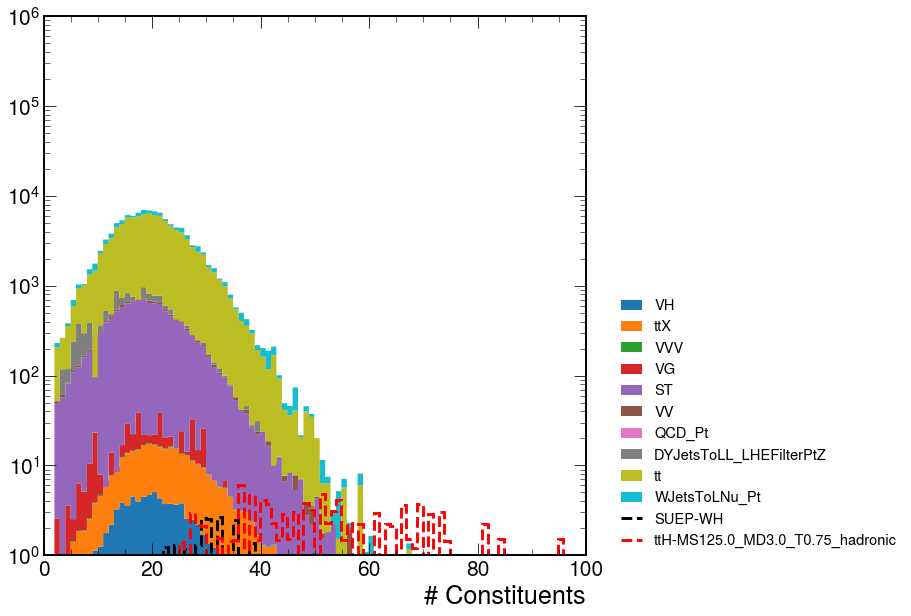

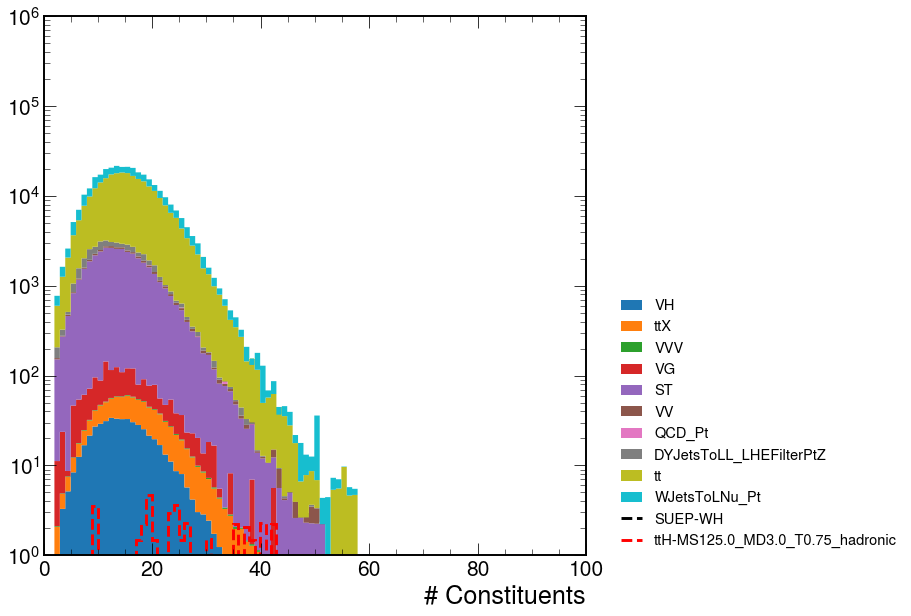

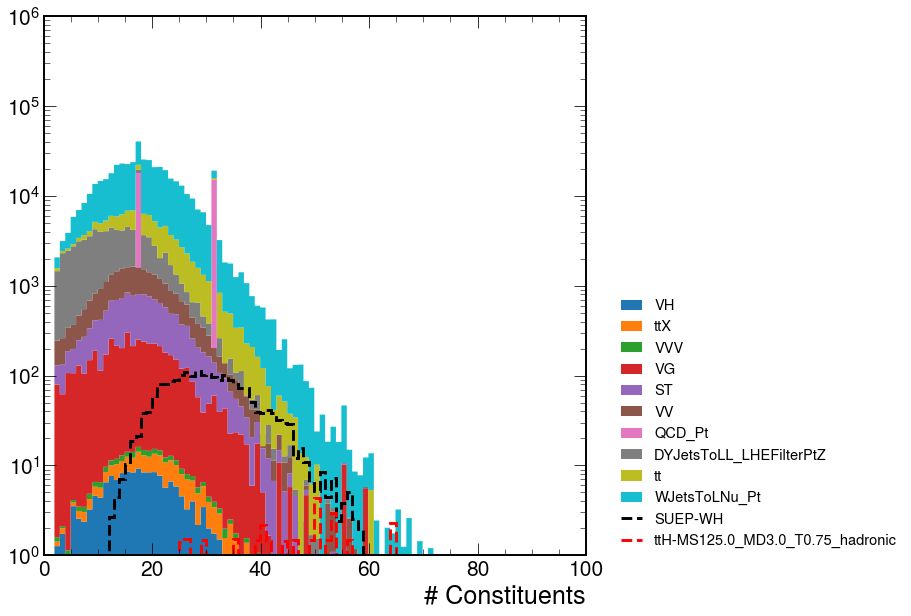

In [7]:
plot_labels = [
    'SUEP_nconst_CRTT',
    'SUEP_nconst_CRTT2',
    'SUEP_nconst_SR',
]
samples = [
    'SUEP-WH',
    'ttH-MS125.0_MD3.0_T0.75_hadronic'
]
stacked_samples = bkgs
density = False
new_bins = None # [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=False, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=False, density=density, label=samples, linestyle='dashed', linewidth=3, color=getColors(samples), ax=ax)
        
    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    plt.ylim(1e0, 1e6)
    plt.xlim(0, 100)

    # save and show
    if saveFigs: fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    fig.show()

## 1D Density Plots
Plot some of the 1D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_labels`: _list of str_, which plots to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>
`density`: _bool_, whether to plot histograms normalized to unity. <br>


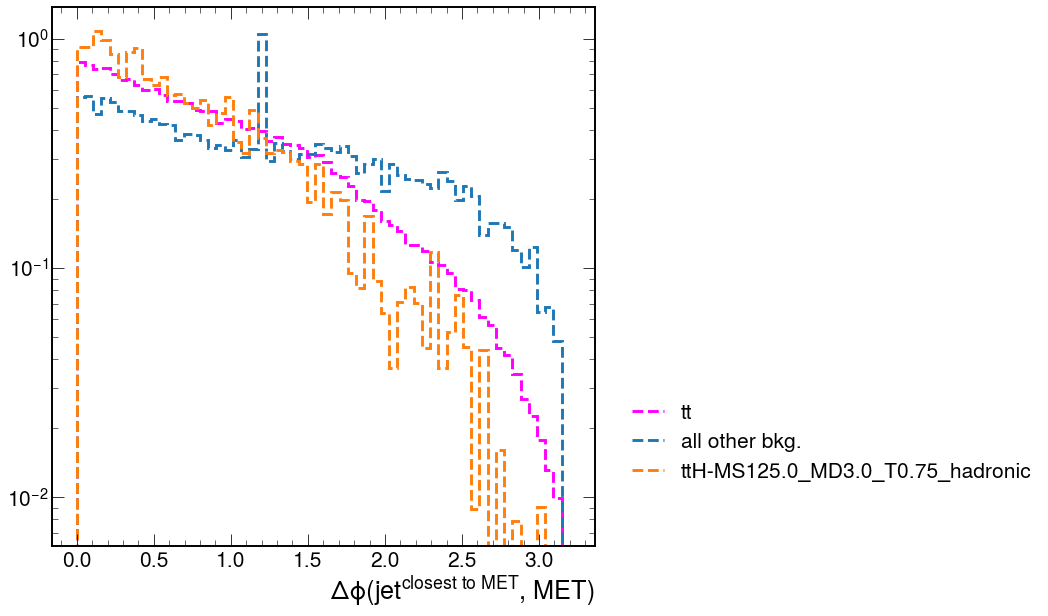

In [132]:
plot_labels = [
    #'nphotons_SR',
    # 'photon1_pt_SR',
    # 'photon1_eta_SR',
    # 'photon1_pixelSeed_SR',
    # 'photon1_mvaID_SR',
    # 'photon1_electronVeto_SR',
    # 'photon1_hoe_SR',
    # 'photon1_r9_SR',
    # 'photon1_cutBased_SR',
    # 'photon1_pfRelIso03_all_SR',
    # 'photon1_isScEtaEB_SR',
    # 'photon1_isScEtaEE_SR',
    # 'minDeltaR_ak4jet_photon1_SR',
    # 'minDeltaR_lepton_photon1_SR',
    # 'W_jet1_vBV_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_CRTT_beforeCut9',
    #'W_SUEP_BV_SR',
    #'W_jet1_BV_SR',
    #'SUEP_pt_avg_b_SR',
    #'SUEP_pt_avg_SR',
    #'bjet_btag_SR',
    #'W_jet1_BV_SR',
    #'W_mT_from_MET_SR',
    # 'W_mT_from_MET_SR_full',
    #'MET_pt_SR',
    # 'MET_pt_SR_full',
    # 'MET_pt_CRTT',
    # 'MET_pt_CRTT_full'
    # 'SUEP_nconst_CRTT',
    #'nak4jets_outsideSUEP_SR',
    #'ak4jet1_inSUEPCluster_pt_SR',
    #'ak4SUEP1_SUEP_BV_SR',
    #'W_pT_from_MET_SR'
    #'SUEP_nconst_SR_2'
    #'MET_pt_SR',
    #'W_mT_from_MET_SR',
    #'W_pT_from_MET_SR',
    #'SUEP_nconst_CRTT', 'SUEP_nconst_SR', 'SUEP_S1_CRTT', 'SUEP_S1_SR', 
    #'nBLoose_CRTT', 'nBLoose_SR', 'nBTight_CRTT', 
    #'nBTight_SR', 
    # 'ngood_fastjets_CRTT', 'ngood_fastjets_SR', 'MET_pt_CRTT', 'MET_pt_SR',
    # 'lepton_pt_CRTT', 'lepton_pt_SR',
    #'lepton_eta_SR',
    #'SUEP_eta_SR',
    #"bjet_pt_SR",
    #"SUEP_pt_SR",
    #"jet1_pT_SR",
    #"nBTight_CRTT",
    #'ngood_ak4jets_CRTT',
    #'ngood_ak4jets_SR', 
    # 'W_pT_from_MET_CRTT', 'W_pT_from_MET_SR', 
    #"W_SUEP_pT_ratio_SR", "W_jet1_pT_ratio_SR",
    #"deltaPhi_minDeltaPhiMETJet_SUEP_SR", "deltaPhi_minDeltaPhiMETJet_lepton_SR", "deltaPhi_minDeltaPhiMETJet_MET_SR",
    #"minDeltaPhiMETJet_pt_SR",
    #'deltaPhi_lepton_MET_CRTT', 'deltaPhi_lepton_MET_SR', 'deltaPhi_lepton_SUEP_CRTT', 'deltaPhi_lepton_SUEP_SR',
    #'deltaPhi_SUEP_W_CRTT', 
    #'deltaPhi_SUEP_W_SR', #'deltaPhi_SUEP_MET_CRTT',
    #'deltaPhi_SUEP_MET_SR',
    # 'deltaPhi_bjet_SUEP_CRTT', 'deltaPhi_bjet_SUEP_SR','deltaPhi_bjet_MET_CRTT', 'deltaPhi_bjet_MET_SR','deltaPhi_bjet_lepton_CRTT','deltaPhi_bjet_lepton_SR',
    # 'bjet_pt_CRTT', 'bjet_pt_SR', 'bjet_btag_CRTT', 'bjet_btag_SR', 'bjet_qgl_CRTT', 'bjet_qgl_SR'
]
samples = [
    #'SUEP-WH',
    'tt',
    'MC',
    'ttH-MS125.0_MD3.0_T0.75_hadronic'
]
stacked_samples = []
density = True

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=False, density=density, label=stacked_samples, ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=False, density=density, label=[ 'tt', 'all other bkg.', 'ttH-MS125.0_MD3.0_T0.75_hadronic'], linestyle='dashed', linewidth=3, color=['fuchsia'], ax=ax)
        
    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0.1))
    ax.set_yscale("log")
    #plt.ylim(-1e-4, 1e0)
    #plt.xlim(0, 10)

    # save and show
    if saveFigs: fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    fig.show()

## 1D Plots

In [65]:
print(plots['tt']['ak4jet1_inSUEPcluster_pT_SR'][:90j].sum().value/plots['tt']['ak4jet1_inSUEPcluster_pT_SR'].sum().value)
print(plots['SUEP-WH']['ak4jet1_inSUEPcluster_pT_SR'][:90j].sum().value/plots['SUEP-WH']['ak4jet1_inSUEPcluster_pT_SR'].sum().value)

print(plots['tt']['jet1_pT_SR'][:90j].sum().value/plots['tt']['jet1_pT_SR'].sum().value)
print(plots['SUEP-WH']['jet1_pT_SR'][:90j].sum().value/plots['SUEP-WH']['jet1_pT_SR'].sum().value)

print(plots['tt']['ak4SUEP1_SUEP_BV_SR'][:0j].sum().value/plots['tt']['ak4SUEP1_SUEP_BV_SR'].sum().value)
print(plots['SUEP-WH']['ak4SUEP1_SUEP_BV_SR'][:0j].sum().value/plots['SUEP-WH']['ak4SUEP1_SUEP_BV_SR'].sum().value)

0.2676563835238278
0.6097139971223962
0.2637815473247862
0.6188142989616401
0.23659161291208738
0.8594084908262268


In [67]:
print(plots['WJetsToLNu_Pt']['ak4jet1_inSUEPcluster_pT_SR'][:90j].sum().value/plots['WJetsToLNu_Pt']['ak4jet1_inSUEPcluster_pT_SR'].sum().value)
print(plots['SUEP-WH']['ak4jet1_inSUEPcluster_pT_SR'][:90j].sum().value/plots['SUEP-WH']['ak4jet1_inSUEPcluster_pT_SR'].sum().value)

print(plots['WJetsToLNu_Pt']['jet1_pT_SR'][:90j].sum().value/plots['WJetsToLNu_Pt']['jet1_pT_SR'].sum().value)
print(plots['SUEP-WH']['jet1_pT_SR'][:90j].sum().value/plots['SUEP-WH']['jet1_pT_SR'].sum().value)

print(plots['WJetsToLNu_Pt']['ak4SUEP1_SUEP_BV_SR'][:0j].sum().value/plots['WJetsToLNu_Pt']['ak4SUEP1_SUEP_BV_SR'].sum().value)
print(plots['SUEP-WH']['ak4SUEP1_SUEP_BV_SR'][:0j].sum().value/plots['SUEP-WH']['ak4SUEP1_SUEP_BV_SR'].sum().value)

0.09849862011594071
0.6097139971223962
0.09568201077331959
0.6188142989616401
0.06422656476610024
0.8594084908262268


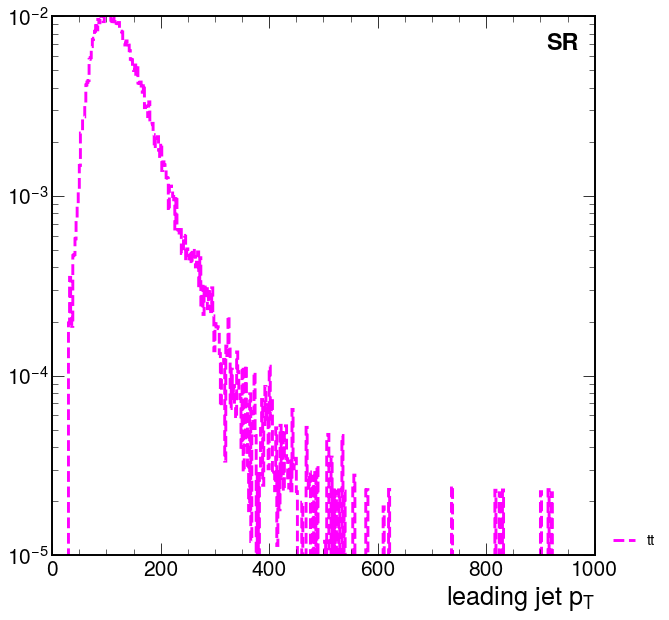

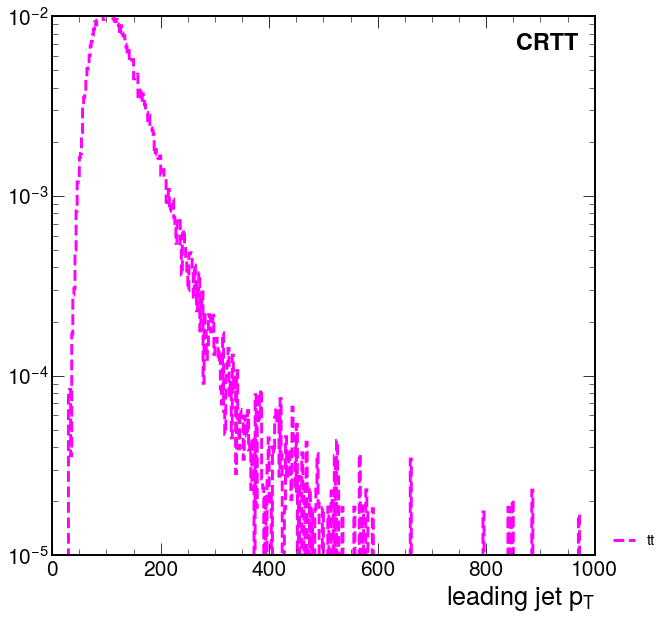

In [41]:
plot_labels = [
    'jet1_pT_SR',
    'jet1_pT_CRTT'
]
samples = [
    #'SUEP-WH-M125.0_MD3.00_T3.00',
    'tt',
]
labels_samples = [
    #'SUEP-WH-M125.0_MD3.00_T3.00',
    'tt',
]
stacked_samples = []
new_bins = None #[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
density = True
yerr = False
saveFigs = False

for plot_label in plot_labels:

    plt.figure()

    h_samples = []
    h_stacked = []
    for sample in samples: 
        h = plots[sample][plot_label]#[:100j:sum, :]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]#[:100j:sum, :]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked.append(h)
     
    if len(h_stacked) > 0: hep.histplot(h_stacked, yerr=yerr, density=density, label=stacked_samples, stack=True, histtype='fill')
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=yerr, density=density, label=labels_samples, linestyle='dashed', linewidth=3, color=['fuchsia'])
        
    # tweak these by hand, as needed
    plt.legend(loc=(1.02,0), fontsize='xx-small')
    plt.yscale("log")
    plt.ylim(1e-5, 1e-2)
    plt.xlim(0, 1000)

    region = plot_label.split("_")[-1]
    plt.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # save and show
    if saveFigs:
        plt.savefig(output_label + plot_label + ".pdf", bbox_inches='tight')
        plt.savefig(output_label + plot_label + ".png", bbox_inches='tight')
    plt.show()


## 2D Plots

Plot some of the 2D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_label`: _str_, which plot to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>

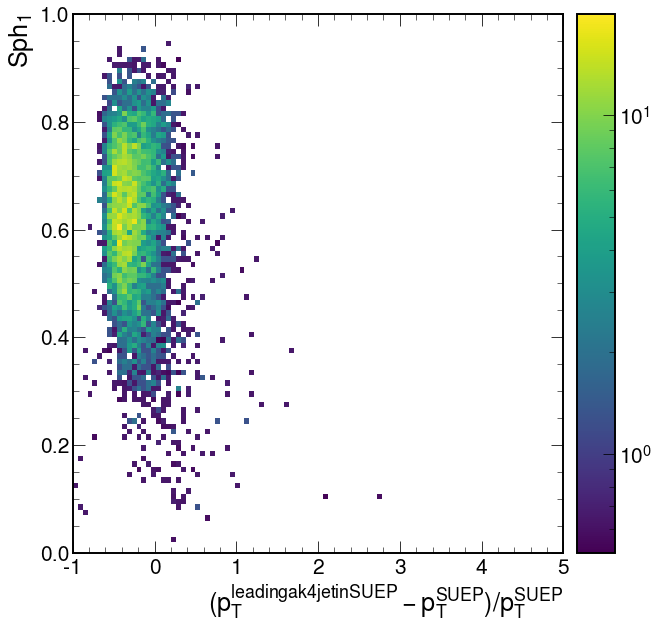

In [21]:
plot_label = '2D_ak4SUEP1_SUEP_BV_vs_SUEP_S1_HighestPT'
samples = ['SUEP-WH']

for sample in samples:
    
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue

    hep.hist2dplot(plots[sample][plot_label][:,:], 
               norm=matplotlib.colors.LogNorm(),
               label=sample) 
        
    #plt.ylim(0,100)
    if saveFigs: plt.savefig(output_label + plot_label+ "_"+sample+file_ext)
    plt.show()

### 2D Hist Slices
Slice a 2D histogram and plot the slices; you can stack them and plot their densities.

(-1.0, 2.0)

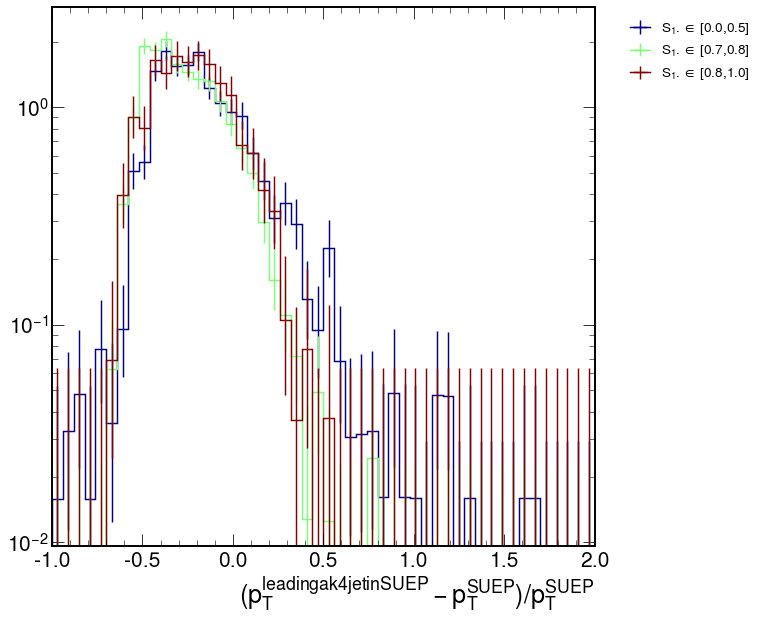

In [22]:
sample = 'SUEP-WH'
slice_var = 'y'
plot_label = '2D_ak4SUEP1_SUEP_BV_vs_SUEP_S1_HighestPT'
stack = False
density = True
regions_list = [[0.0j, 0.5j],[0.7j,0.8j],[0.8j,1.0j]]


labels = [r"$S_1. \in$ [{},{}]".format(round(regions[0].imag, 1), round(regions[1].imag, 1)) for regions in regions_list]
h = plots[sample][plot_label]
fig, ax = plot_sliced_hist2d(h, regions_list, density=density, stack=stack, slice_var=slice_var, labels=labels)
plt.xlim(-1, 2)

## Ratio Plots

### Compare Datasets
Make ratio plots of different datasets.<br>
Parameters:<br>
`selection`: _str_, which selection to use, e.g. 'ch', 'mult'.<br>
`plot_labels`: _list of str_, which plots to make.

In [11]:
print(plots.keys())

dict_keys(['TTJets_HT', 'TTJets_HT-1200to2500', 'TTJets_HT-2500toInf', 'TTJets_HT-600to800', 'TTJets_HT-800to1200', 'TTJets_incl', 'tt', 'TTTo2L2Nu', 'TTToSemiLeptonic'])


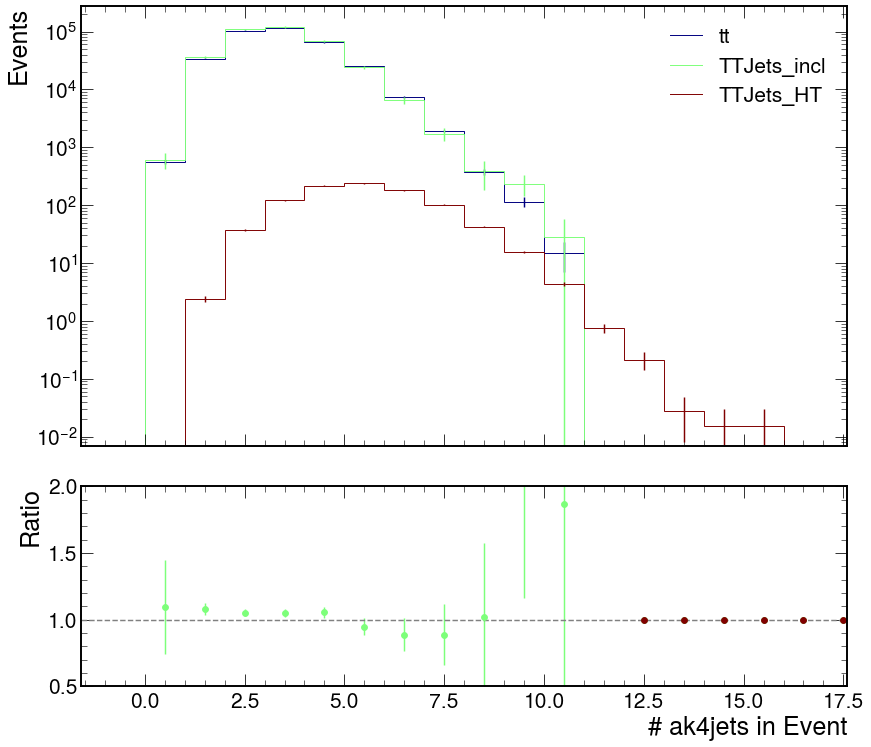

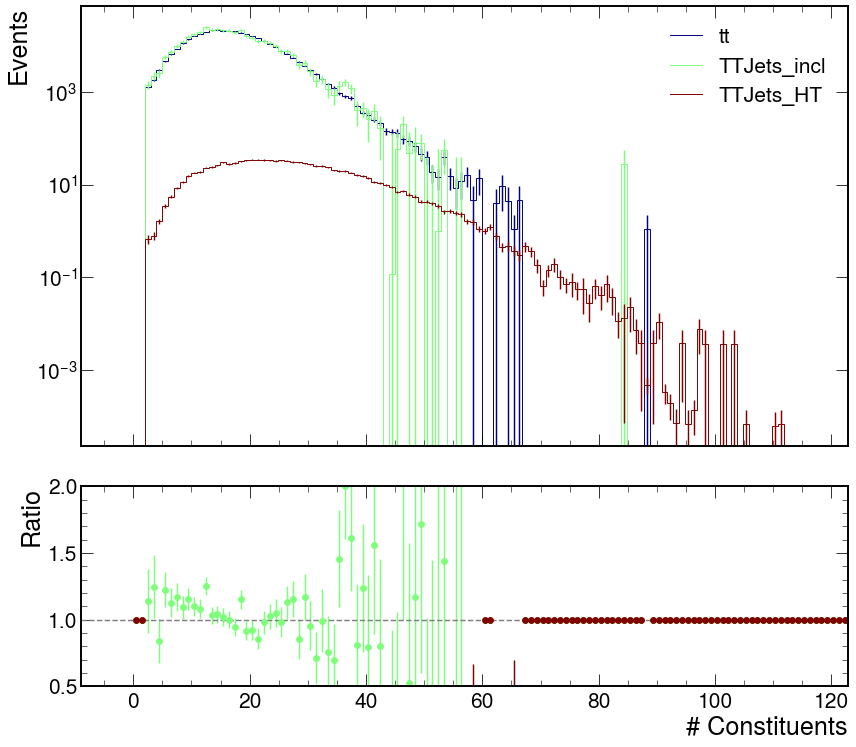

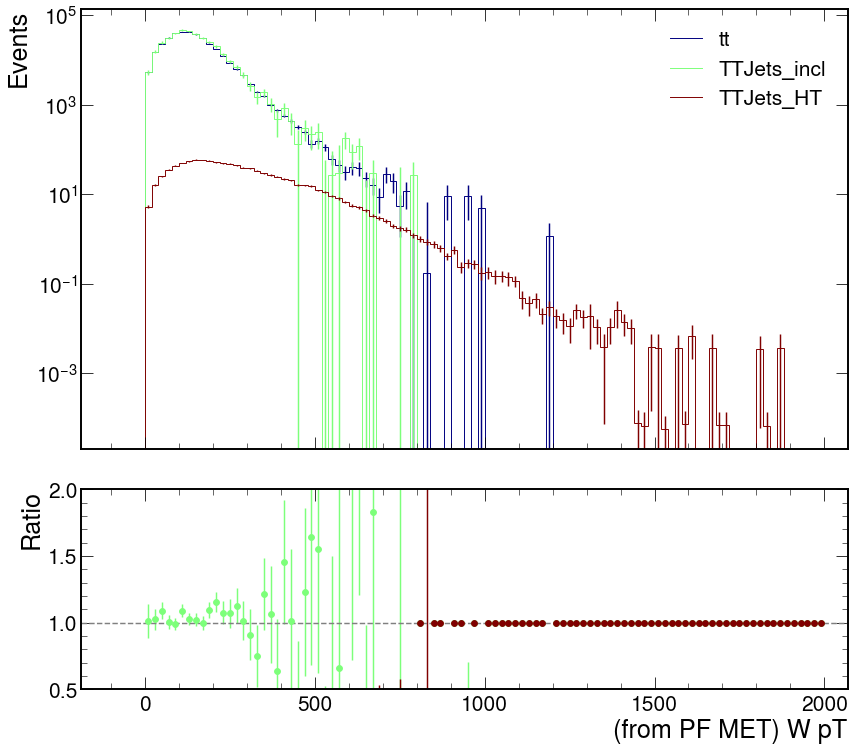

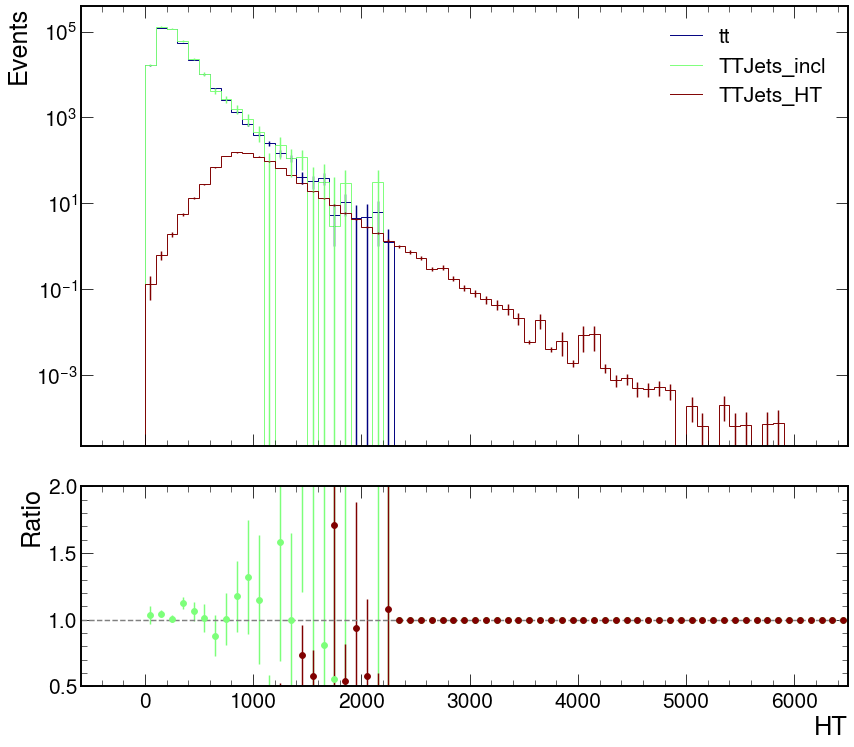

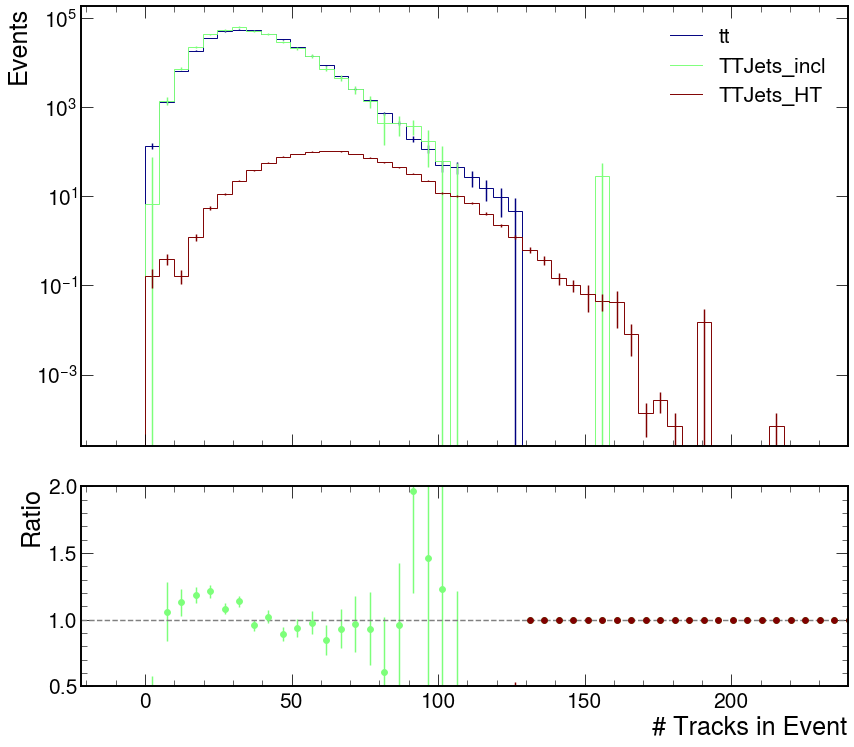

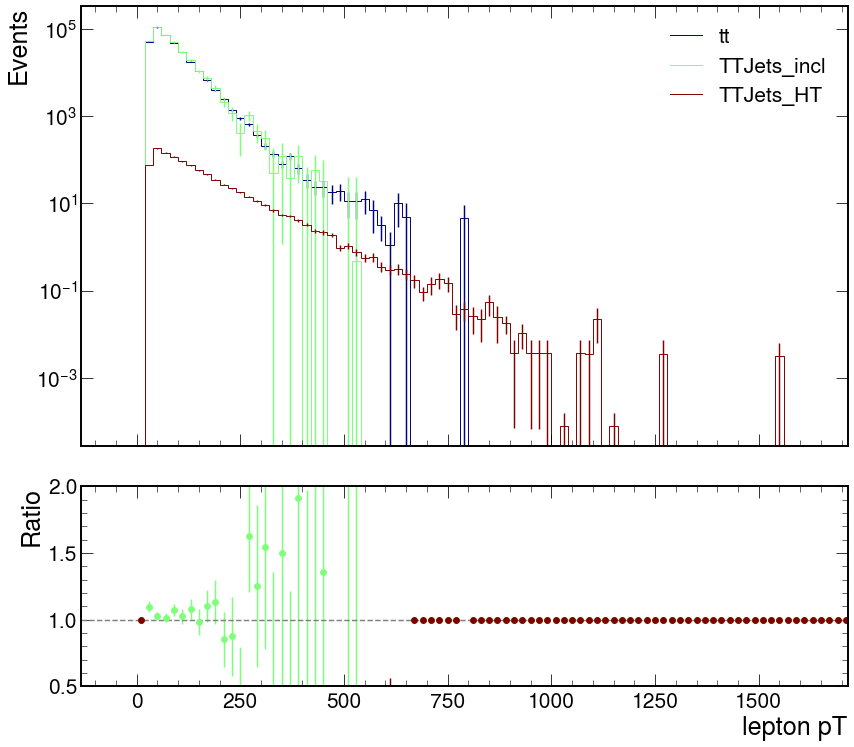

In [13]:
plot_labels = [
    'ngood_ak4jets_HighestPT',
    'SUEP_nconst_HighestPT',
    'W_pT_from_MET_HighestPT',
    'ht_HighestPT',
    'ntracks_HighestPT',
    'lepton_pt_HighestPT',
    #"W_SUEP_pT_ratio_HighestPT", "W_jet1_pT_ratio_HighestPT",
    #"deltaPhi_minDeltaPhiMETJet_SUEP_HighestPT", "deltaPhi_minDeltaPhiMETJet_lepton_HighestPT", "deltaPhi_minDeltaPhiMETJet_MET_HighestPT",
    #'deltaPhi_SUEP_W_HighestPT',  'deltaPhi_SUEP_MET_HighestPT', 'deltaPhi_lepton_SUEP_HighestPT', 'deltaPhi_lepton_MET_HighestPT',
    #'deltaPhi_bjet_SUEP_HighestPT','deltaPhi_bjet_MET_HighestPT','deltaPhi_bjet_lepton_HighestPT',
]
samples = [
    'tt',
    'TTJets_incl',
    'TTJets_HT',
   # 'TTJets_HT-1200to2500', 'TTJets_HT-2500toInf', 'TTJets_HT-600to800', 'TTJets_HT-800to1200',
]
# samples = [
#     'WJetsToLNu_HT',
#     'WJetsToLNu_Pt',
# ]
density = False
saveFigs = False

for plot_label in plot_labels:

    hlist = [plots[sample][plot_label][::1j] for sample in samples]

    fig, axs = plot_ratio(hlist, samples, density=density)
    fig.set_size_inches(15, 18)

    axs[0].legend()
    axs[0].legend(loc='best')
    axs[1].set_ylim(0.5,2.0)
    #axs[0].set_xlim(0,1000)
    
    if saveFigs: plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

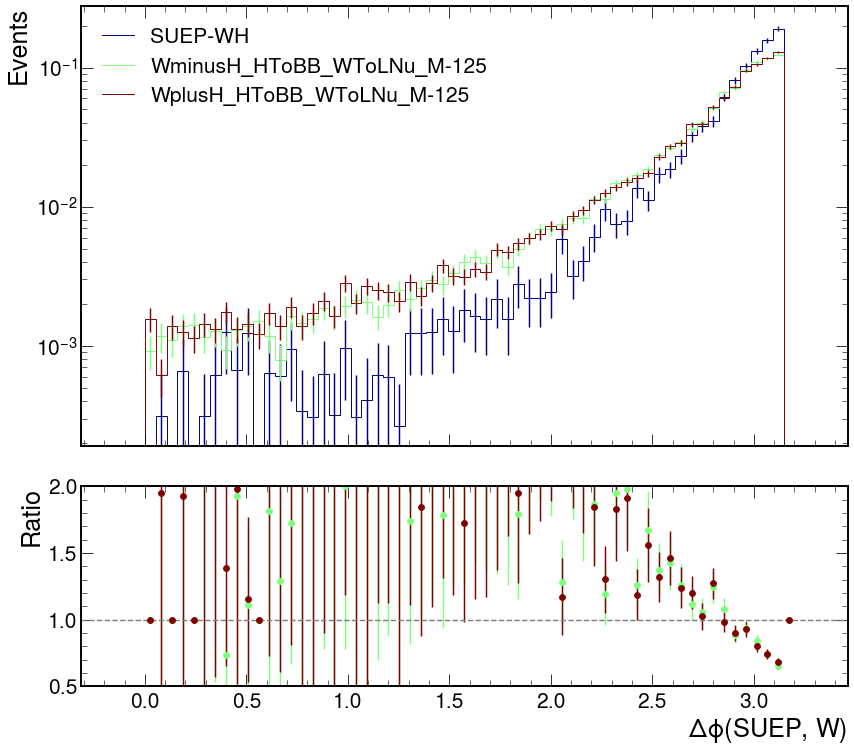

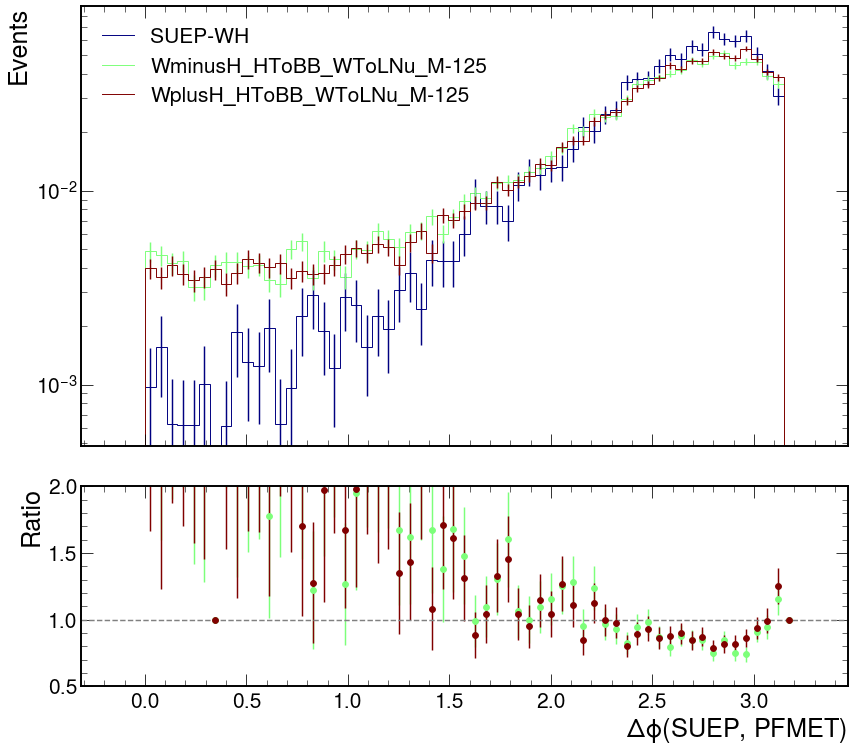

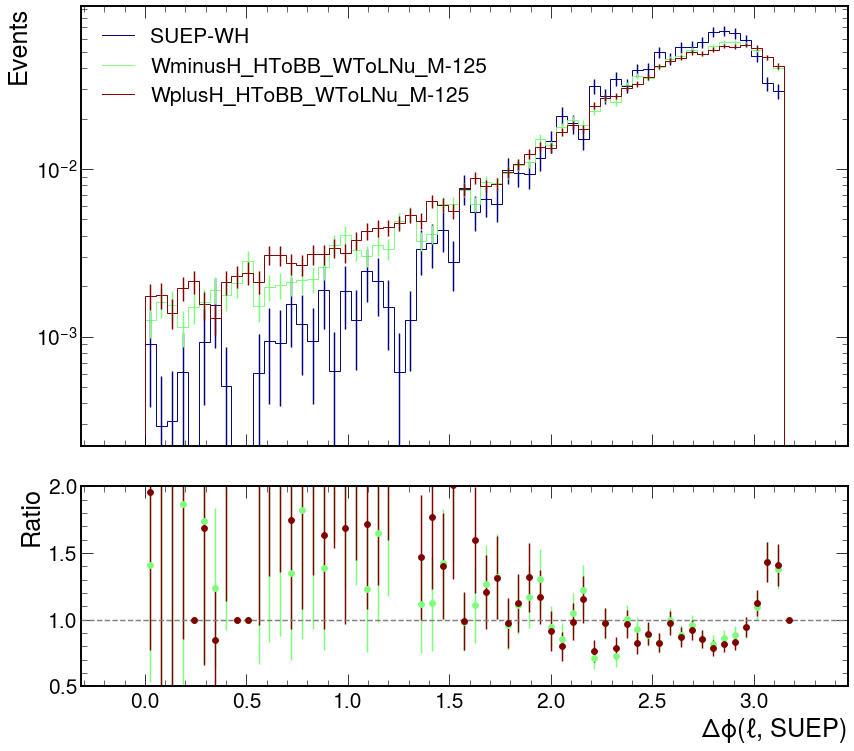

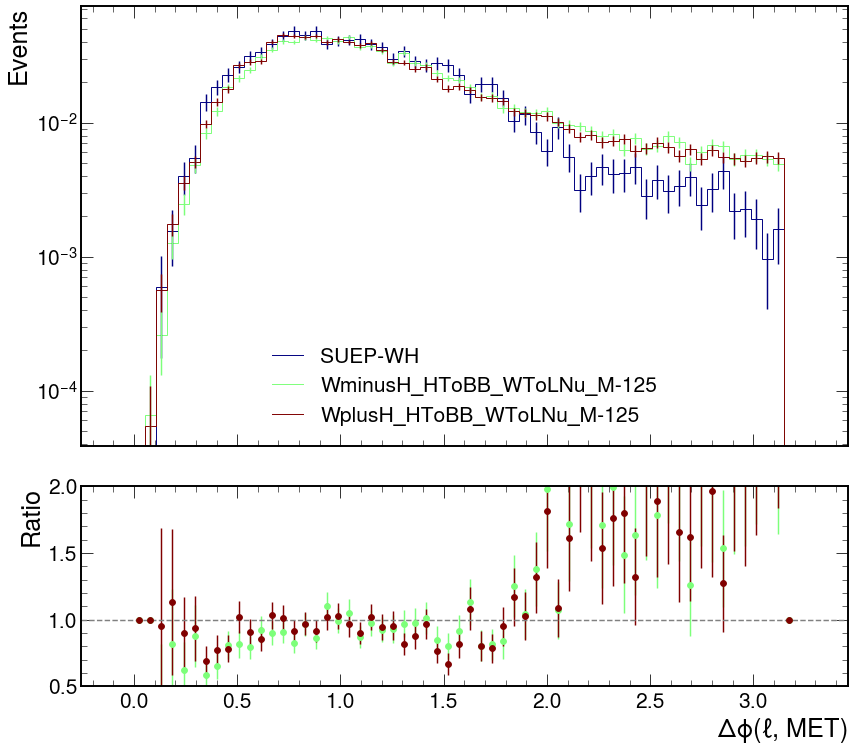

In [28]:
plot_labels = [
    #'SUEP_nconst_HighestPT',
    #'W_pT_from_MET_HighestPT',
    #'ht_HighestPT',
    #'ntracks_HighestPT',
    #"W_SUEP_pT_ratio_HighestPT", "W_jet1_pT_ratio_HighestPT",
    #"deltaPhi_minDeltaPhiMETJet_SUEP_HighestPT", "deltaPhi_minDeltaPhiMETJet_lepton_HighestPT", "deltaPhi_minDeltaPhiMETJet_MET_HighestPT",
    'deltaPhi_SUEP_W_HighestPT',  'deltaPhi_SUEP_MET_HighestPT', 'deltaPhi_lepton_SUEP_HighestPT', 'deltaPhi_lepton_MET_HighestPT',
    #'deltaPhi_bjet_SUEP_HighestPT','deltaPhi_bjet_MET_HighestPT','deltaPhi_bjet_lepton_HighestPT',
]
samples = [
    'SUEP-WH',
    'WminusH_HToBB_WToLNu_M-125',
    'WplusH_HToBB_WToLNu_M-125'
]
# samples = [
#     'WJetsToLNu_HT',
#     'WJetsToLNu_Pt',
# ]
density = True
saveFigs = False

for plot_label in plot_labels:

    hlist = [plots[sample][plot_label][::1j] for sample in samples]

    fig, axs = plot_ratio(hlist, samples, density=density)
    fig.set_size_inches(15, 18)

    axs[0].legend()
    axs[0].legend(loc='best')
    axs[1].set_ylim(0.5,2.0)
    #axs[0].set_xlim(0,1000)
    
    if saveFigs: plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

### Compare Variables

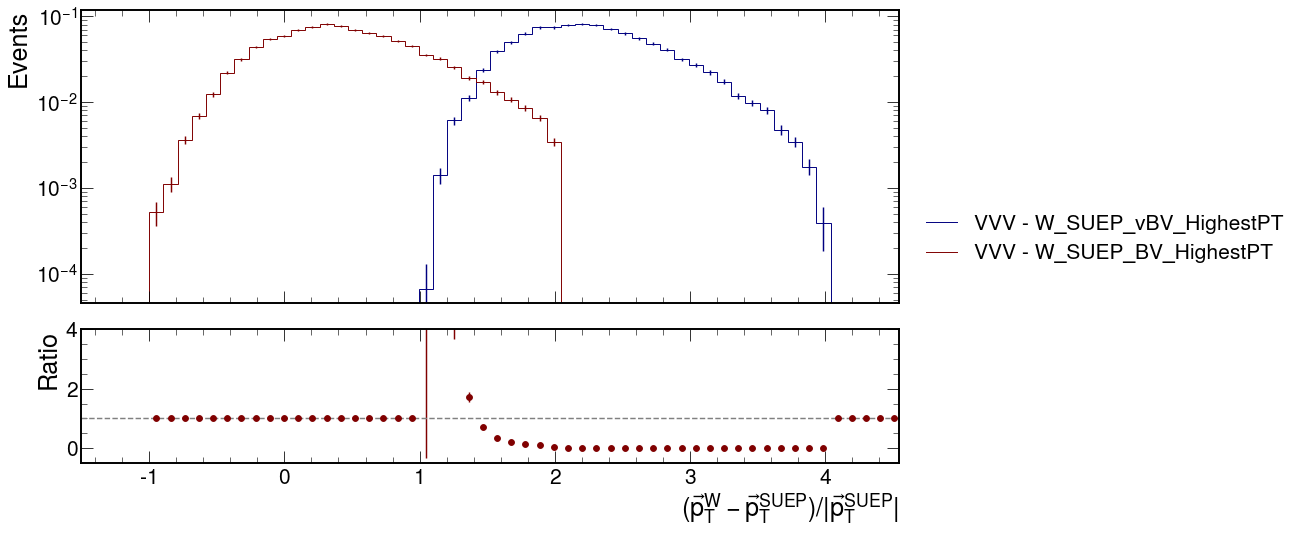

In [50]:
plot_labels = ['W_SUEP_vBV_HighestPT', 'W_SUEP_BV_HighestPT']
samples = ['VVV']
density = False

hlist, labels = [], []
for plot_label in plot_labels:
    for sample in samples:
        hlist.append(plots[sample][plot_label])
        labels.append(sample + " - " + plot_label)

# our custom ratio calculates errors differently, more appropriate for plotting densities
fig, axs = plot_ratio(hlist, labels, density=True)
axs[0].legend(loc=(1.02,0.1))
axs[1].set_ylim(-0.5, 4.0)

if saveFigs: plt.savefig(output_label + "ratio_".join(plot_labels) + file_ext, bbox_inches='tight')
plt.show()

### Ratios of Slices
Slice a 2D histogram for both two samples or variables and plot ratio of each of the slices.

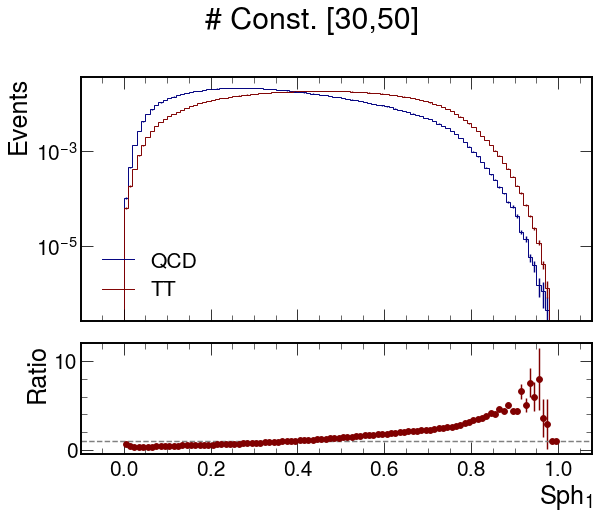

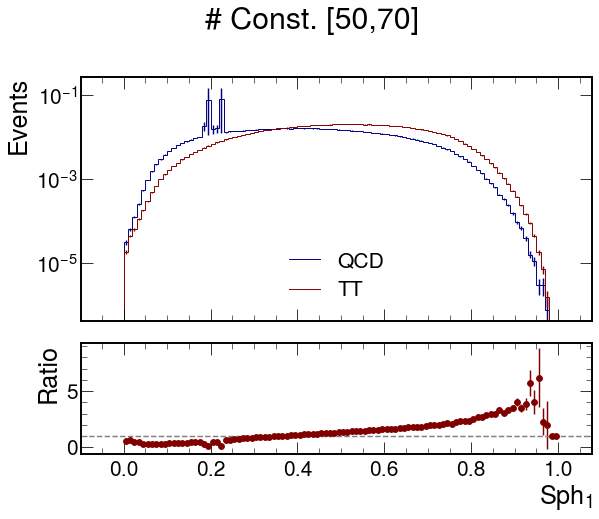

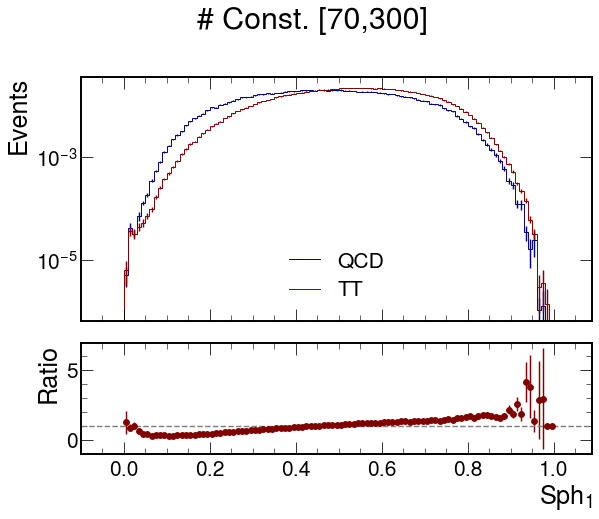

In [16]:
h1 = plots['QCD_HT']["2D_SUEP_S1_vs_SUEP_nconst_Cluster70"]
h2 = plots['TTBkg']["2D_SUEP_S1_vs_SUEP_nconst_Cluster70"]

regions_list = [[30j,50j], [50j,70j], [70j,300j]]
h1_slices = slice_hist2d(h1, regions_list, slice_var='y')
h2_slices = slice_hist2d(h2, regions_list, slice_var='y')

for h1_slice, h2_slice, regions in zip(h1_slices, h2_slices, regions_list):
    
    h1_slice = h1_slice[:]
    h2_slice = h2_slice[:]
    
    h1_slice = h1_slice/h1_slice.sum().value
    h2_slice = h2_slice/h2_slice.sum().value
  
    fig, axs = plot_ratio([h1_slice, h2_slice], ['QCD', 'TT'], density=True)
    axs[0].legend()

    fig.suptitle("# Const. [{},{}]".format(int(regions[0].imag), int(regions[1].imag)))
    plt.show()

## Automatic Plotting
Plot all histograms and save them automatically.<br>

### All 1D and 2D Plots

SUEP_nconst_SR, 
SUEP_S1_SR, 
ht_SR, 
ht_JEC_SR, 
ht_JEC_JER_up_SR, 
ht_JEC_JER_down_SR, 
ht_JEC_JES_up_SR, 
ht_JEC_JES_down_SR, 
ntracks_SR, 
ngood_fastjets_SR, 
PV_npvs_SR, 
Pileup_nTrueInt_SR, 
ngood_ak4jets_SR, 
ngood_ak4jets_noLepIso_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
2D_SUEP_S1_vs_SUEP_nconst_SR, 
2D_SUEP_S1_vs_ntracks_SR, 
SUEP_genMass_SR, 
SUEP_pt_SR, 
SUEP_delta_pt_genPt_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
SUEP_pt_avg_SR, 
SUEP_pt_avg_b_SR, 
SUEP_eta_SR, 
SUEP_phi_SR, 
SUEP_mass_SR, 
SUEP_delta_mass_genMass_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
SUEP_ISR_deltaPhi_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram em

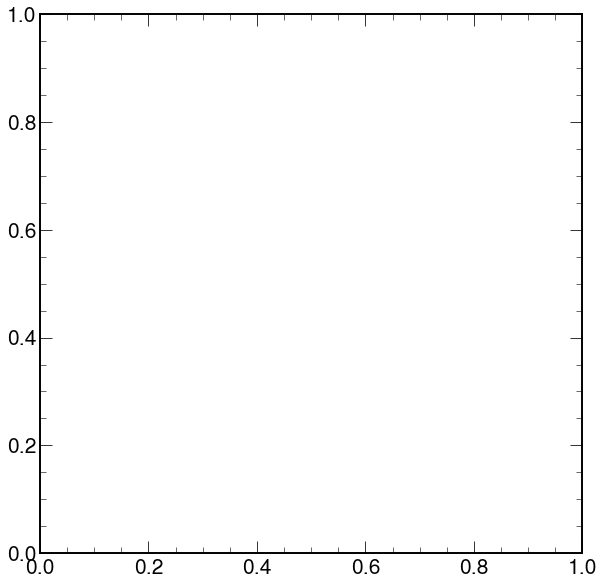

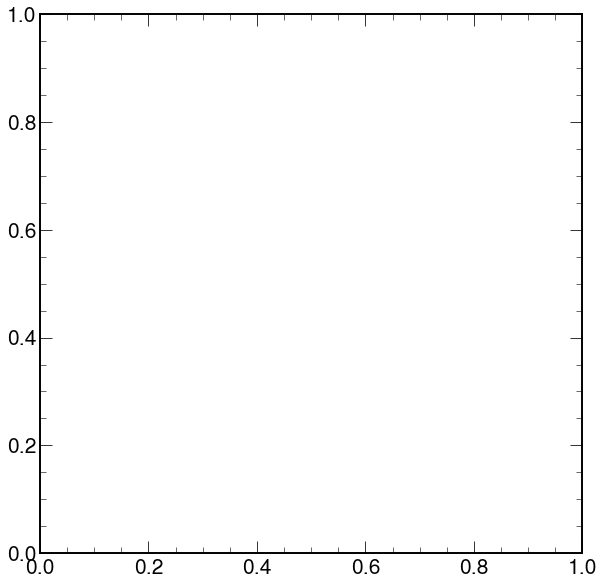

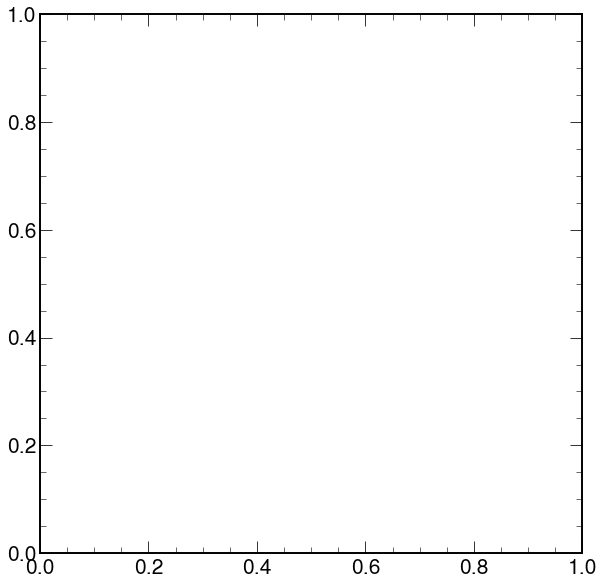

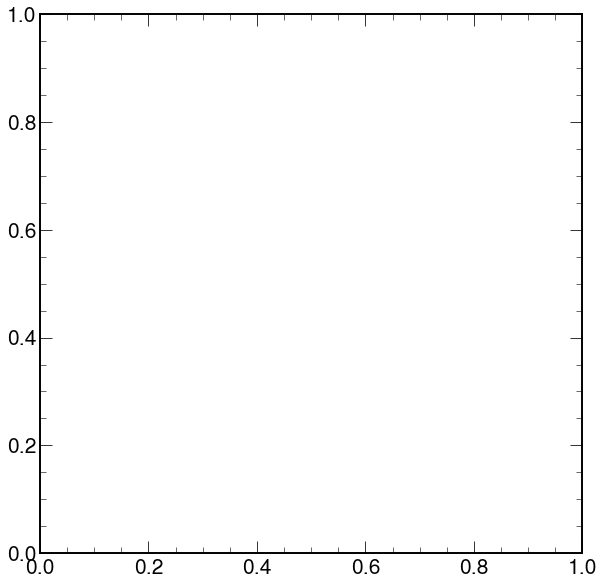

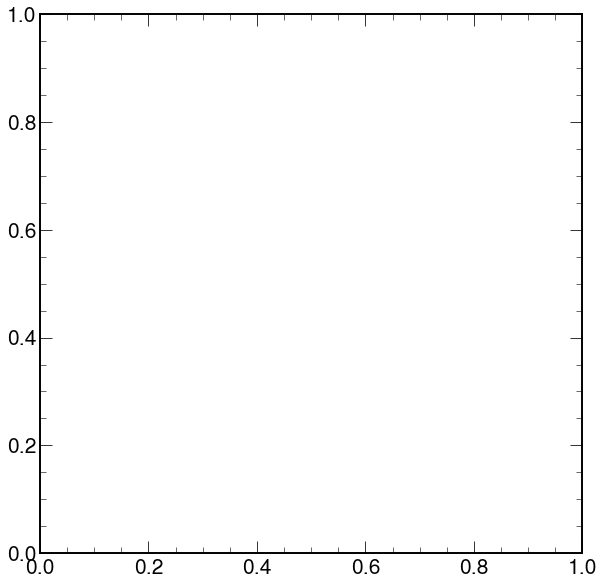

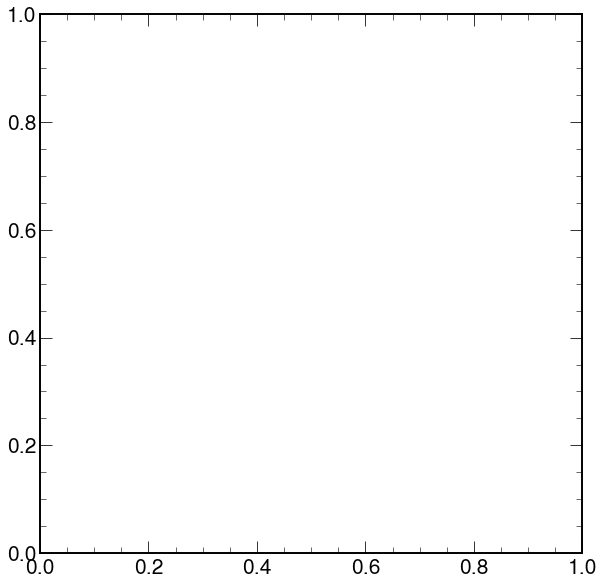

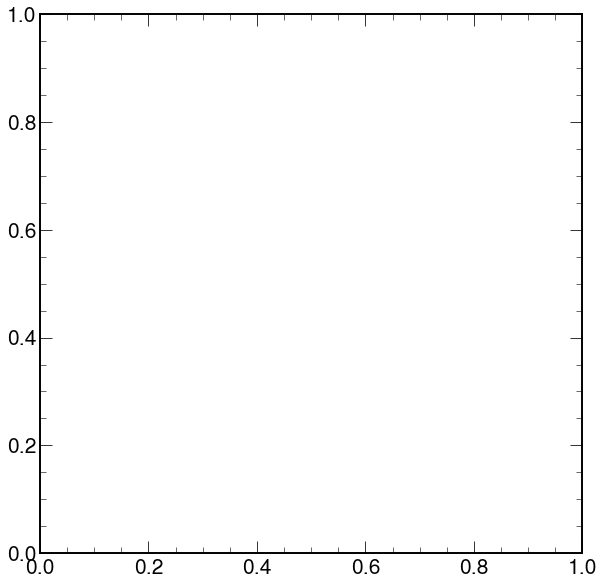

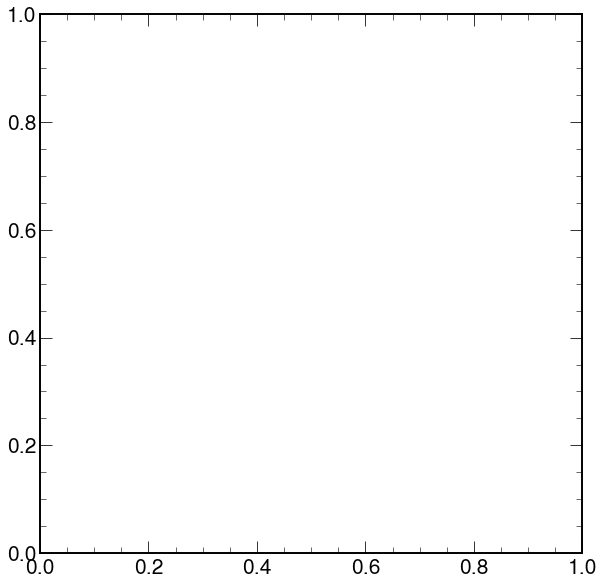

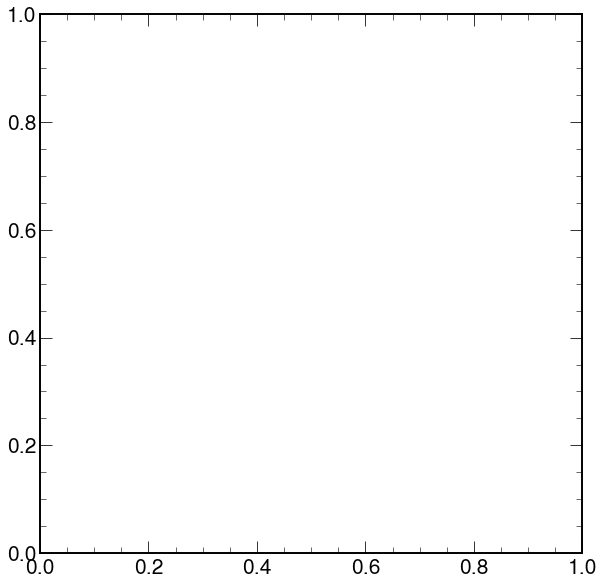

In [171]:
outdir = 'allplots/'
unstacked_samples = [
    'SUEP-WH-M125.0_MD3.00_T0.75',
    'ttH-MS125.0_MD3.0_T0.75_hadronic',
    'tt',
]
stacked_samples = []
density = True
yerr = False

all_samples = unstacked_samples + stacked_samples
plot_labels = [k for k in list(plots[all_samples[0]].keys())]
if not os.path.isdir(output_label+outdir): os.system("mkdir " + str(output_label+outdir))

for plot_label in plot_labels:
    print(plot_label, end=", ")

    fig = plt.figure()
    ax = fig.add_subplot()
    
    # 2D plots
    if '2D' in plot_label:    
        for sample in stacked_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue

            # plot each sample separately
            h = plots[sample][plot_label]
            hep.hist2dplot(h, 
                       norm=matplotlib.colors.LogNorm(),
                       label=sample,
                       ax=ax) 
            fig.savefig(output_label + outdir + plot_label+ "_"+sample+file_ext, bbox_inches='tight')
            plt.close()
        
    # 1D variables
    else:

        # plot all samples in same histogram
        stacked_hists, stacked_histlabels = [], []
        unstacked_hists, unstacked_histlabels = [], []
        for sample in all_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue
        
        # plot everything
        for sample in all_samples:
            h = plots[sample][plot_label]
            if sample in stacked_samples: 
                stacked_hists.append(h)
                stacked_histlabels.append(sample)
            elif sample in unstacked_samples:
                unstacked_hists.append(h)
                unstacked_histlabels.append(sample)

        region = plot_label.split("_")[-1]
        ax.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

        if len(stacked_hists) > 0: hep.histplot(stacked_hists, label=stacked_histlabels, yerr=yerr, density=density, stack=True, histtype='fill', ax=ax)
        if len(unstacked_hists) > 0: hep.histplot(unstacked_hists, label=unstacked_histlabels, yerr=yerr, density=density, stack=False, histtype='step', ax=ax)
        if len(stacked_hists) > 0 or len(unstacked_hists) > 0:
            ax.legend(loc=(1.02,0), fontsize='xx-small')
            ax.set_yscale("log")
            #ax.set_ylim(1e-5,1e0)
            fig.savefig(output_label + 'allplots/' + plot_label + ".pdf", bbox_inches='tight')
            fig.savefig(output_label + 'allplots/' + plot_label + ".png", bbox_inches='tight')
        plt.close()

    print()
print("All done")

### All Ratios: 1D Plots
For each 1D histogram, make a ratio plot between two samples.

In [ ]:
plot_labels = list(plots['QCD_HT_2018'].keys())
density = False
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if '2D' in plot_label: continue

        print(plot_label, end=", ")
        h1 = plots[l1][plot_label]
        h2 = plots[l2][plot_label]
        
        if h1.sum().value == 0 or h2.sum().value == 0: continue
        
        if density: 
            h1 = h1/h1.sum().value
            h2 = h2/h2.sum().value
            fig, axs, _ = plot_ratio(h1, h2, label1=l1, label2=l2)
            axs[0].legend()
        else:
            fig = plt.figure(figsize=(10, 8))
            _ = h1.plot_ratio(h2,
                             rp_num_label=l1,
                             rp_denom_label=l2)
            fig.axes[0].set_yscale("log")
            fig.axes[1].set_ylim(0.4,1.6)
            
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

    print("All done")

### All Ratios: Combined Regions

In [ ]:
density = True

plot_labels = list(plots['QCD_HT_2018'].keys())
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"_combinedRegions/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if "A_" not in plot_label: continue
        print(plot_label, end=", ")
        
        h1 = plots[l1][plot_label.replace("A_", "")]
        h2 = plots[l2][plot_label.replace("A_", "")]
        if h1.sum().value == 0 or h2.sum().value == 0:
            print("Empty", end=", ")
            continue
            
        # x or y define order of regions
        x = 'ABCDEFGH'
        y = 'ADGBEHCF'
        _ = plot_ratio_regions(plots, plot_label, l1, l2, x, density=density)
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

## ABCD
Make the ABCD regions by hand from one of the 2D plots.<br>
Notation: `hist[v1:v2::sum]` sums along an axis from v1 to v2 (leave either blank to extend the summation bounds arbitrarily).

### ABCD Independent Variables Check
1D slices of 2D plots, usually used to check the independence of the ABCD method's two variables on the QCD sample. This won't work if QCD has been binned by pt. <br>
N.B.: Imaginary numbers are used to access the bin value; using real numbers would access the bin number (see hist documentation for more info).<br>
Parameters:<br>
`plot_label`:_str_, which plot to analyze.<br>
`sample`: _str_, which sample to analyze.<br>
`variables`: _str_, variables being sliced, used to pick the slices in the loop.<br>
`slices`: _list of lists of floats_, bins of values to be sliced. e.g. for equal slices use np.linspace(start, end, number of bins), if not can specify as [[0,10],[20,40],[40,50],...].

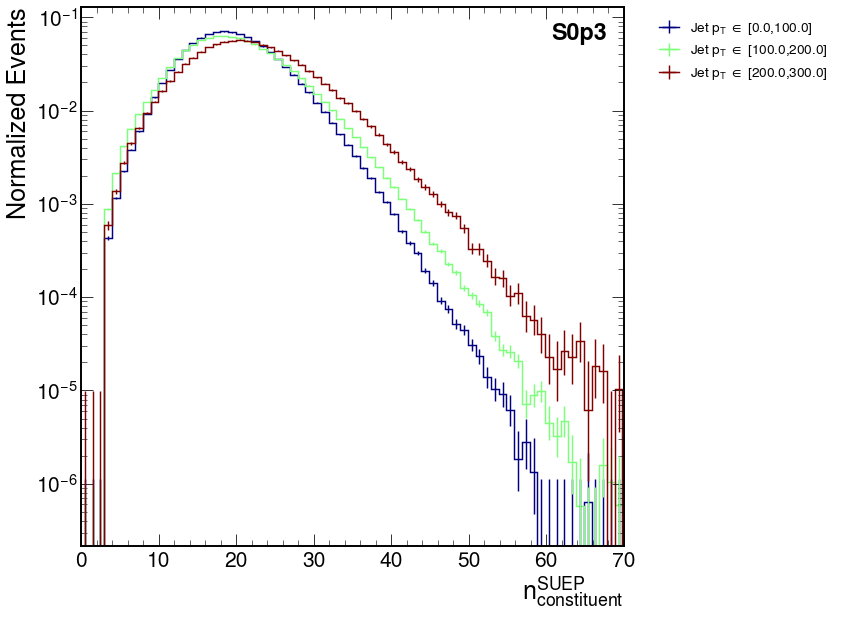

In [38]:
# parameters
#plot_label = '2D_jet1_pT_vs_SUEP_nconst_SR'
#plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT'
plot_label = '2D_ak4jet1_inSUEPcluster_pT_vs_SUEP_nconst_CRTT_S0p3'

sample = 'tt'
slices = [[0.0j, 100j], [100j, 200j], [200j,300j]]
sliced_variable = 'Jet $p_T$'
#slices = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 0.7j], [0.7j, 1.0j]]
#sliced_variable = '$S_1$'

labels = [r"{} $\in$ [{},{}]".format(sliced_variable, round(s[0].imag, 1), round(s[1].imag, 1)) for s in slices]
h = plots[sample][plot_label][:,:]
fig, ax = plot_sliced_hist2d(h, slices, density=True, stack=False, slice_var="x", labels=labels)

ax.text(0.97, 0.97, plot_label.split("_")[-1], transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')
ax.set_xlim(0, 70)
ax.set_ylabel("Normalized Events")
if saveFigs: fig.savefig(output_label + plot_label + "_" + sliced_variable + "_SLICES" + file_ext,  bbox_inches='tight')
fig.show()

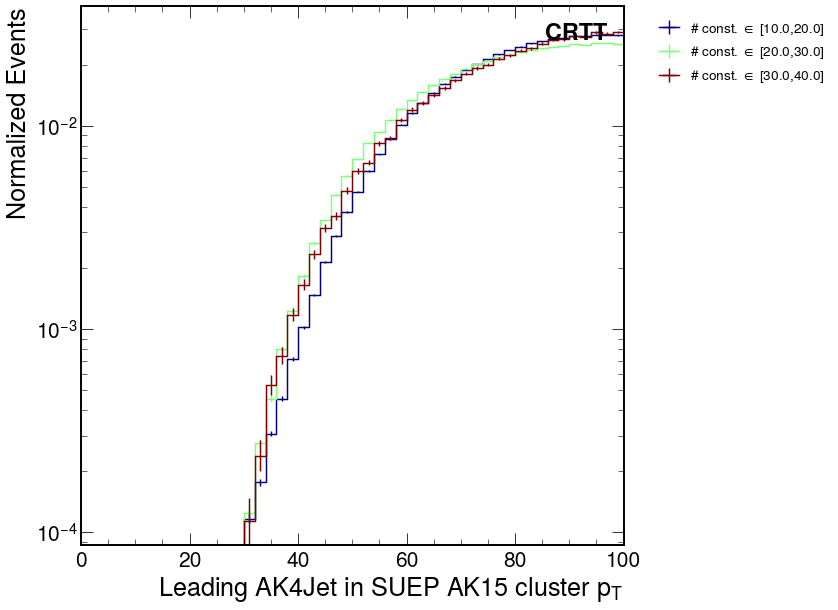

In [32]:
# parameters
#plot_label = '2D_jet1_pT_vs_SUEP_nconst_SR'
#plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT'
plot_label = '2D_ak4jet1_inSUEPcluster_pT_vs_SUEP_nconst_CRTT'

sample = 'tt'
slices = [[10j, 20j], [20j, 30j], [30j, 40j]]
sliced_variable = '# const.'
#slices = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 0.7j], [0.7j, 1.0j]]
#sliced_variable = '$S_1$'

labels = [r"{} $\in$ [{},{}]".format(sliced_variable, round(s[0].imag, 1), round(s[1].imag, 1)) for s in slices]
h = plots[sample][plot_label][:100j,:]
fig, ax = plot_sliced_hist2d(h, slices, density=True, stack=False, slice_var="y", labels=labels)

ax.text(0.97, 0.97, plot_label.split("_")[-1], transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')
ax.set_xlim(0, 100)
ax.set_ylabel("Normalized Events")
if saveFigs: fig.savefig(output_label + plot_label + "_" + sliced_variable + "_SLICES" + file_ext,  bbox_inches='tight')
fig.show()

### Compare samples across ABCD regions
Make first a plot for different samples of all ABCD regions combined into one histogram, and then a ratio for different samples.<br>

Text(1, 0, '$Sph_1$')

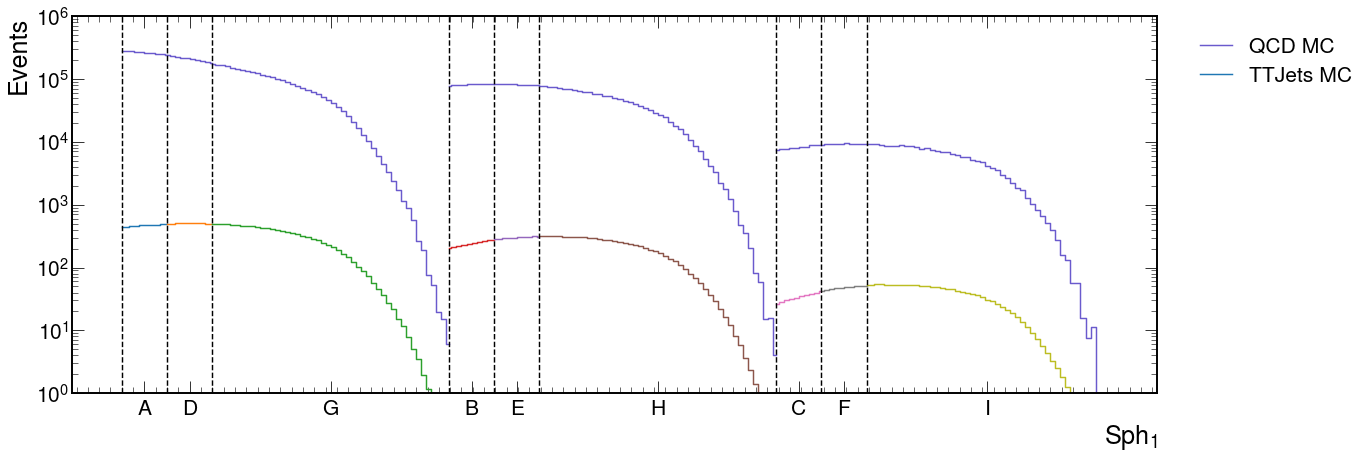

In [13]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
plot_label = 'SUEP_S1_Cluster70'
samples = ['QCD_HT', 'TTBkg']
labels = ['QCD MC', 'TTJets MC']

fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                            labels=labels, regions=y, density=False)

ax.set_ylim(1e0, 1e6)
ax.set_xlabel(r"$Sph_1$")

QCD_HT
TTBkg


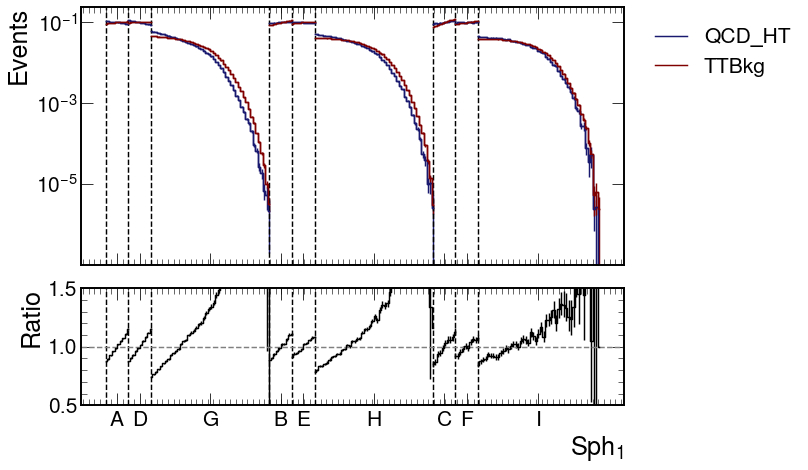

In [25]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
plot_labels = ['SUEP_S1_Cluster70']
sample1 = 'QCD_HT'
sample2 = 'TTBkg'

for plot_label in plot_labels:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           sample1, sample2, 
                           y, density=True)
    ax2.set_ylim(0.5,1.5)
    fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')

### 4 Regions
Check closure in D region for one sample.

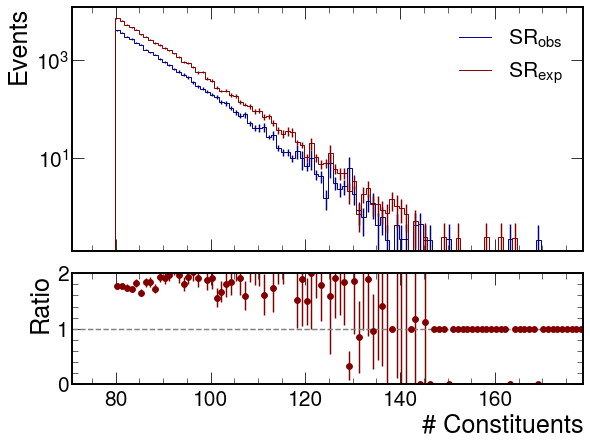

In [17]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
abcd = plots['QCD_HT_2018'][plot_label]
xregions = [0.35j, 0.5j, 1.0j]
yregions = [10j, 80j, 300j]

SR, SR_exp = ABCD_4regions(abcd, xregions, yregions, sum_var='x')

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()

### 6 Regions

(0.4, 1.6)

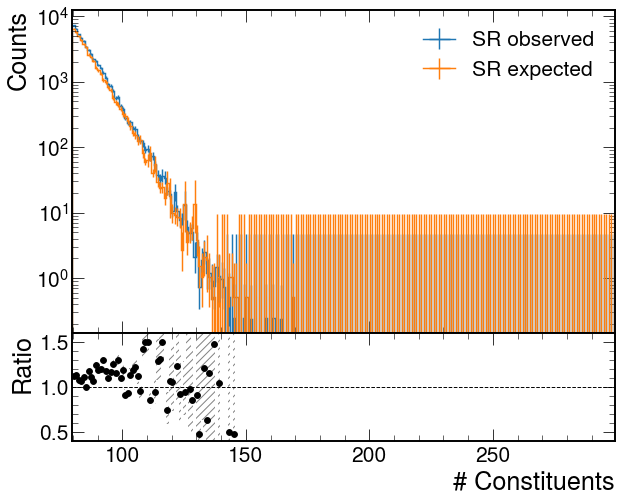

In [20]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
abcd = plots['QCD_HT_2018'][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [10j, 80j, 300j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')

fig = plt.figure(figsize=(10, 8))
main, sub = SR.plot_ratio(SR_exp,
                rp_num_label='SR observed',
                rp_denom_label='SR expected',
                rp_uncert_draw_type="bar")
fig.axes[0].set_yscale("log")
fig.axes[1].set_ylim(0.4,1.6)

### 9 Regions with error propagation

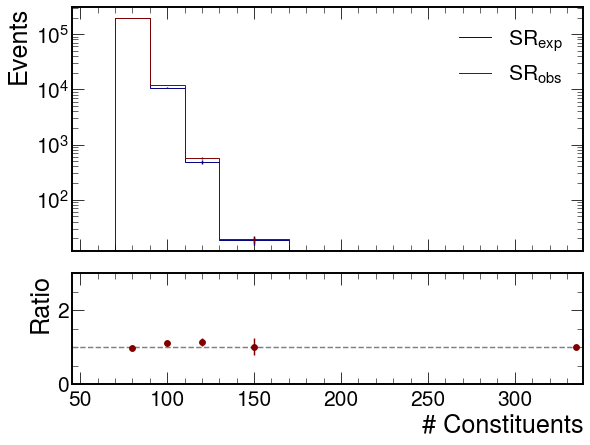

In [21]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
new_bins = [70, 90, 110, 130, 170, 500]
rebin = True
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]
sample = 'QCD_HT_2018'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')
if rebin:
    edges = SR.axes[0].edges
    SR = rebin_piecewise(SR, new_bins)
    SR_exp = rebin_piecewise(SR_exp, new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])
_ = axs[1].set_ylim(0.0,3.0)

## Systematics

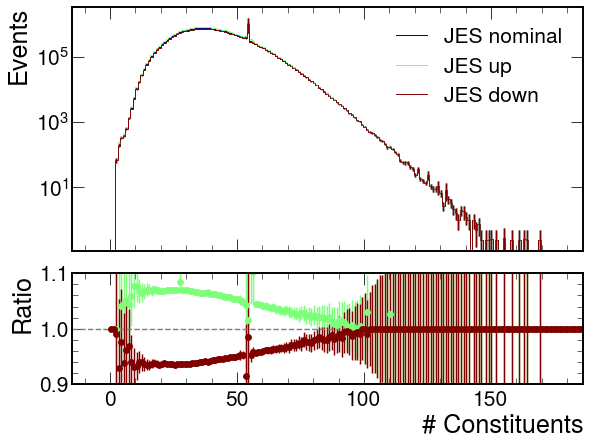

In [22]:
plot_label = 'SUEP_nconst_Cluster70'
sample = 'QCD_HT'
sys = 'JES'

fig, axs = plot_sys_variations(plots[sample], plot_label, sys)

## Yields
Integrate histograms to calculate yields.<br>
Parameters:<br>
`lumi`: _float_, scales MC data.<br>
`plot_label`: _str_, which plot you want to integrate.

In [27]:
plot_label = 'W_SUEP_pT_ratio_HighestPT'
samples = ['WHleptonicpythia_generic_M125.0_MD2.00_T2.00_HT-1_UL18_NANOAOD_WH_Feb27_v3', 'tt', 'ttX', 'ST']

for sample in samples:
    h = plots[sample][plot_label]
    passing = h[:0.8j].sum().value
    total = h.sum().value
    print(sample, round(passing/total, 3))

WHleptonicpythia_generic_M125.0_MD2.00_T2.00_HT-1_UL18_NANOAOD_WH_Feb27_v3 0.923
tt 0.708
ttX 0.735
ST 0.688
